# Data Mining Group Assignment

This project is a data mining for boston airbnb open data. By cleaning and analyzing listings, calendar and review data, we explore the hidden patterns, trends and relationships between these data.
In the data pre-processing, we removed nulls and outliers from the model, and removed stop words and different language outliers from the text data. This provides complete and valid data for in-depth data analysis. We also used rich visualization, using line graphs, histograms, confusion matrices, word clouds, and other visual tu'xing models such as decision trees, linear regression, random forests, and KNeightbours. We provide effective information for the platform, host and users from the perspective of user preferences, host attributes, user reviews, etc., to explore the future potential of the market and provide effective suggestions for the relevant stakeholder to use.

## Pre-Processing
We first conduct data cleaning on the three data sets to eliminate the outliers, invalid values, empty values, and other data that are not suitable for this assignment.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline


In [2]:
calendar_df = pd.read_csv('calendar.csv')
listings_df = pd.read_csv('listings.csv')
reviews_df = pd.read_csv('reviews.csv')


In [3]:
calendar_df.shape


(1308890, 4)

In [4]:
calendar_df.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [5]:
listings_df.shape

(3585, 95)

In [6]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [7]:
reviews_df.shape

(68275, 6)

In [8]:
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [9]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [10]:
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [11]:
calendar_df.set_index('listing_id', inplace=True)


In [12]:
calendar_df.head()

,date,available,price
listing_id,,,
12147973,2017-09-05,f,NaN
12147973,2017-09-04,f,NaN
12147973,2017-09-03,f,NaN
12147973,2017-09-02,f,NaN
12147973,2017-09-01,f,NaN


In [13]:
# remove dollar, comma characters to convert price column to float
calendar_df.price = calendar_df.price.str.lstrip('$').str.replace(',', '')
calendar_df.price = calendar_df.price.astype('float')

In [14]:
# convert string date to datetime object
calendar_df.date = pd.to_datetime(calendar_df.date)

In [15]:
# test
calendar_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1308890 entries, 12147973 to 14504422
Data columns (total 3 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   date       1308890 non-null  datetime64[ns]
 1   available  1308890 non-null  object        
 2   price      643037 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 39.9+ MB


In [16]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   listing_id     68275 non-null  int64 
 1   id             68275 non-null  int64 
 2   date           68275 non-null  object
 3   reviewer_id    68275 non-null  int64 
 4   reviewer_name  68275 non-null  object
 5   comments       68222 non-null  object
dtypes: int64(3), object(3)
memory usage: 3.1+ MB


In [17]:
reviews_df.set_index('id', inplace=True)

In [18]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [19]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [20]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [21]:
listings_df.set_index('id', inplace=True)

In [22]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [23]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [24]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [25]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [26]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [27]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [28]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [29]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [30]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [31]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [32]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [33]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [34]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [35]:
listings_df.fillna(0, inplace=True)

In [36]:
# test
listings_df.shape

(3254, 91)


# 1. Which type of room tend to receive higher review scores? 
### Problem formulation:

In the Airbnb Boston dataset, various of types of rooms are provided, guests can provide review scores to the room they lived in in terms of cleanliness, checkin, communication , location, and value. The following analyses tries to find out which type of room tend to receive higher review scores, so hosts are able to improve their review based on the resutls.

1. Goal: Based on the data analysis and visualization,  classify the relation between scores of different aspects of review (i.e. location & cleanliness, checkin & communication) and room types.

2. Input: different room types, review score of location and cleanliness.

3. Output: Visualization of the actual classification color map and the trained color map using the dataset.


In [37]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [38]:
!pip install scikit-learn

In [39]:
x1 = listings_df['review_scores_location']
x2 = listings_df['review_scores_cleanliness']
X = listings_df[['review_scores_location','review_scores_cleanliness']]
y = listings_df['room_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

In [54]:
x3 = listings_df['review_scores_checkin']
x4 = listings_df['review_scores_communication']
X2 = listings_df[['review_scores_checkin','review_scores_communication']]
y2 = listings_df['room_type']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) # 70% training and 30% test

In [40]:
X_test.shape

(977, 2)

In [55]:
X2_test.shape

(977, 2)

### Visualization of the color maps

Text(0, 0.5, 'review_scores_cleanliness')

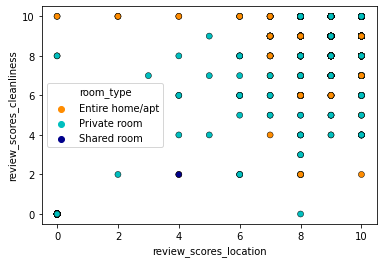

In [42]:
# Create color maps for Visualization
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
 
# Plot the training points
sns.scatterplot(x=x1, y=x2, hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel('review_scores_location')
plt.ylabel('review_scores_cleanliness')

Text(0, 0.5, 'review_scores_communication')

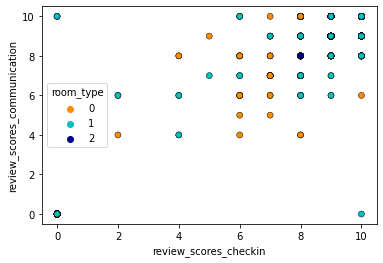

In [58]:
# Create color maps for Visualization
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ['darkorange', 'c', 'darkblue']
 
# Plot the training points
sns.scatterplot(x=x3, y=x4, hue=y2,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlabel('review_scores_checkin')
plt.ylabel('review_scores_communication')

### Discussion:
Based on the color map, we can tell that the review score of both location and cleanliness are relatively higher for room type of entire home/apartment and private room. And no obvious pattern for checkin and communication.

### visualization of the color map

In [43]:
print(y)

id
12147973    Entire home/apt
3075044        Private room
6976           Private room
1436513        Private room
7651065        Private room
                 ...       
8373729        Private room
14844274       Private room
14585486    Entire home/apt
14603878       Private room
14504422       Private room
Name: room_type, Length: 3254, dtype: object


## Replace the room_type value with integer 0,1,2

In [44]:
listings_df.room_type[listings_df.room_type == 'Entire home/apt']=0
listings_df.room_type[listings_df.room_type == 'Private room']=1
listings_df.room_type[listings_df.room_type == 'Shared room']=2



C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22032\3673180782.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df.room_type[listings_df.room_type == 'Entire home/apt']=0
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22032\3673180782.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  listings_df.room_type[listings_df.room_type == 'Private room']=1
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_22032\3673180782.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.ht

## Change datatype of room_type

In [45]:
listings_df['room_type'].dtypes

dtype('O')

In [46]:
listings_df["room_type"] = listings_df["room_type"].astype(int)

In [47]:
listings_df['room_type'].dtypes

dtype('int32')

In [48]:
y = listings_df['room_type']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test
print(y)

id
12147973    0
3075044     1
6976        1
1436513     1
7651065     1
           ..
8373729     1
14844274    1
14585486    0
14603878    1
14504422    1
Name: room_type, Length: 3254, dtype: int32


In [59]:
y2 = listings_df['room_type']
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.3) # 70% training and 30% test

In [60]:
n_neighbors = 3
weights = 'distance' 
clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
clf.fit(X_train, y_train)
clf.fit(X2_train, y2_train)

KNeighborsClassifier(n_neighbors=3, weights='distance')

### visualization of the trained color map

D:\Anaconda\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'review_scores_cleanliness')

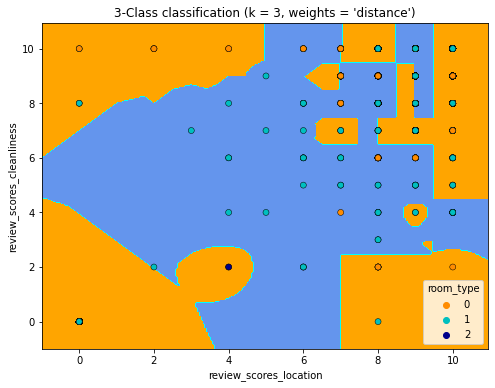

In [50]:
# Visualizing the decision boundary.

h = .05  # step size in the mesh
x_min, x_max = x1.min() - 1, x1.max() + 1
y_min, y_max = x2.min() - 1, x2.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points on top of decision boundary
sns.scatterplot(x=x1, y=x2, hue=y,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.xlabel('review_scores_location')
plt.ylabel('review_scores_cleanliness')


D:\Anaconda\Anaconda\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


Text(0, 0.5, 'review_scores_communication')

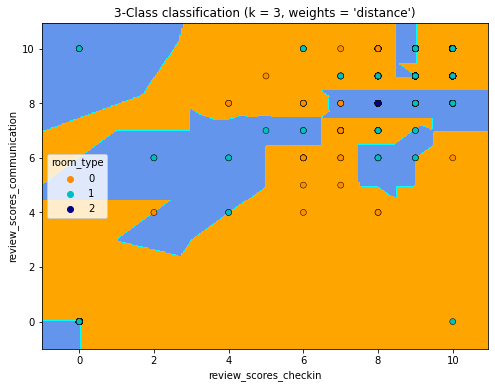

In [61]:
# Visualizing the decision boundary.

h = .05  # step size in the mesh
x_min, x_max = x3.min() - 1, x3.max() + 1
y_min, y_max = x4.min() - 1, x4.max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])


Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot training points on top of decision boundary
sns.scatterplot(x=x3, y=x4, hue=y2,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("3-Class classification (k = %i, weights = '%s')"
          % (n_neighbors, weights))

plt.xlabel('review_scores_checkin')
plt.ylabel('review_scores_communication')

In [51]:
listings_df.room_type.unique()

array([0, 1, 2])

In [52]:
y_pred = clf.predict(X_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5578300921187308


In [63]:
y2_pred = clf.predict(X2_test)
# Model Accuracy
print("Accuracy:",metrics.accuracy_score(y2_test, y2_pred))

Accuracy: 0.5332650972364381


### Discussion & Conclusion:
Based on the trained color map and training accuracy, we cannot tell there exists a clear classification, but generally entire home tend to receive both the highest and the lowest scores, while private rooms are likely to receive average review scores. Hosts can better organize their rooms to improve their review scores.

<h1>2. How can hosts raise prices to make more profit?</h1>
<h2>Problem formulation. </h2> 
Problem: In the Airbnb Boston dataset, there is a lot of data that can be related to price, and for hosts, finding factors related to price can help them price better or make improvements to earn more money. Therefore, we will analyze what factors are related to price in this dataset.

1：Goals. Based on the data analysis and visualization, we will realize the analysis of the factors influencing the price of the property, and provide references for hosts and users.
  
2: Input: The factors in listing.csv that may be related to price. 

3: Output: Visualization chart of the relationship between price and these factors.

<b>Room_type and Property</b> 

1.Total number of each rome_type in the dataset.

In [52]:
features_df = listings_df.copy()
# checking if the target label has all entries recorded
features_df.price.count()
# categorizing number of listings with room type
room_type_count = features_df.room_type.value_counts()
room_type_count

0    1825
1    1353
2      76
Name: room_type, dtype: int64

2.The rome_type distribution chart.

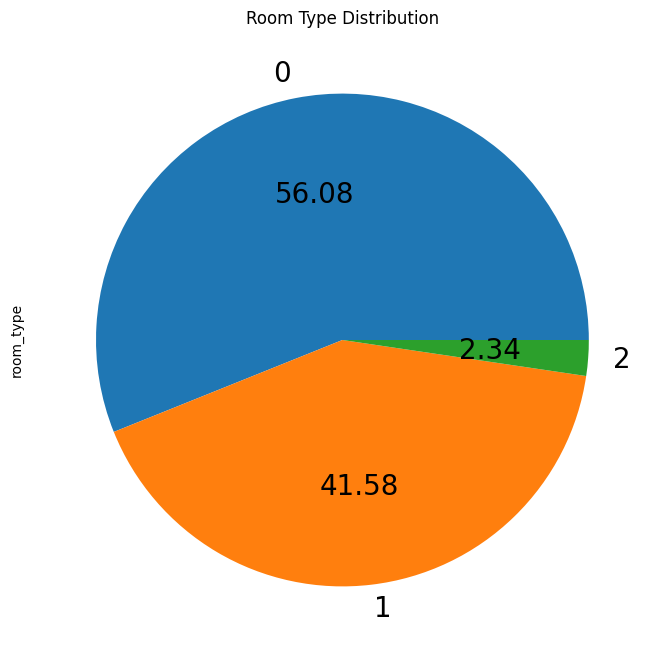

In [53]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');
#From the chart it can be conclued that three are three types of room in the airbnb

<b>Discussion:</b>  
We can see that there are only three types of room types in Airbnb Boston listings, the largest number of which are for entire home and private rooms, with only a very small percentage being shared rooms.

3.The property_type distribution chart.

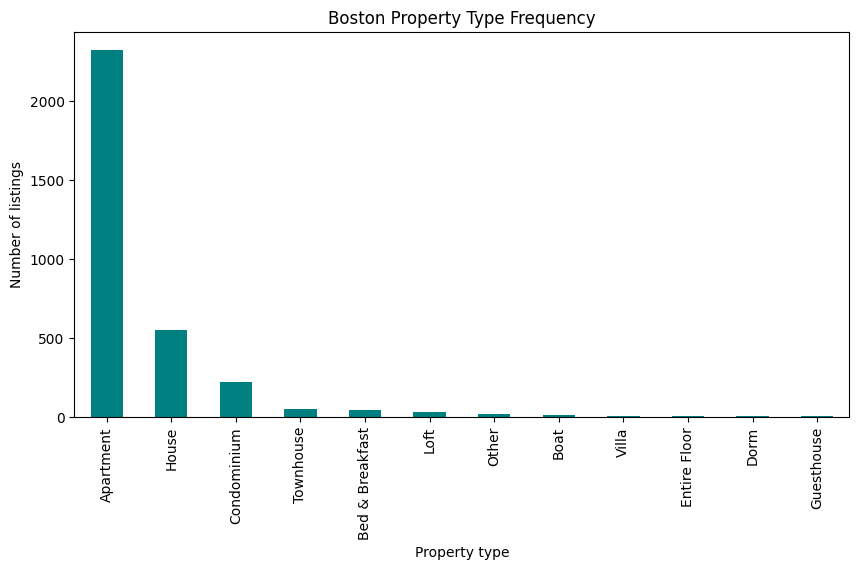

In [54]:
# clean property type column
features_df.property_type.unique()
features_df = features_df[features_df.property_type != 0]
# number of listings based on the property type
property_type_count = features_df.property_type.value_counts()
property_type_count
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

<b>Discussion:</b>  
The bar chart shows us the distribution of property types, with the most listings in Airbnb Boston being apartment type houses, followed by houses and condominiums.

4.The mean prices for different group of room type and property type

In [55]:
# analyzing the prices for different room type and property type
prices_data = features_df.groupby(['property_type','room_type']).price.mean()
prices_data

property_type    room_type
Apartment        0            234.173476
                 1             99.102464
                 2             85.409836
Bed & Breakfast  0            142.500000
                 1            132.777778
                 2             44.000000
Boat             0            265.200000
                 1            287.000000
Condominium      0            239.381295
                 1            109.000000
                 2             70.000000
Dorm             1             62.500000
Entire Floor     0            154.000000
                 1             90.000000
Guesthouse       0            289.000000
House            0            284.219858
                 1             80.428212
                 2             62.333333
Loft             0            237.500000
                 1             96.250000
                 2             83.000000
Other            0            324.500000
                 1            181.363636
                 2            

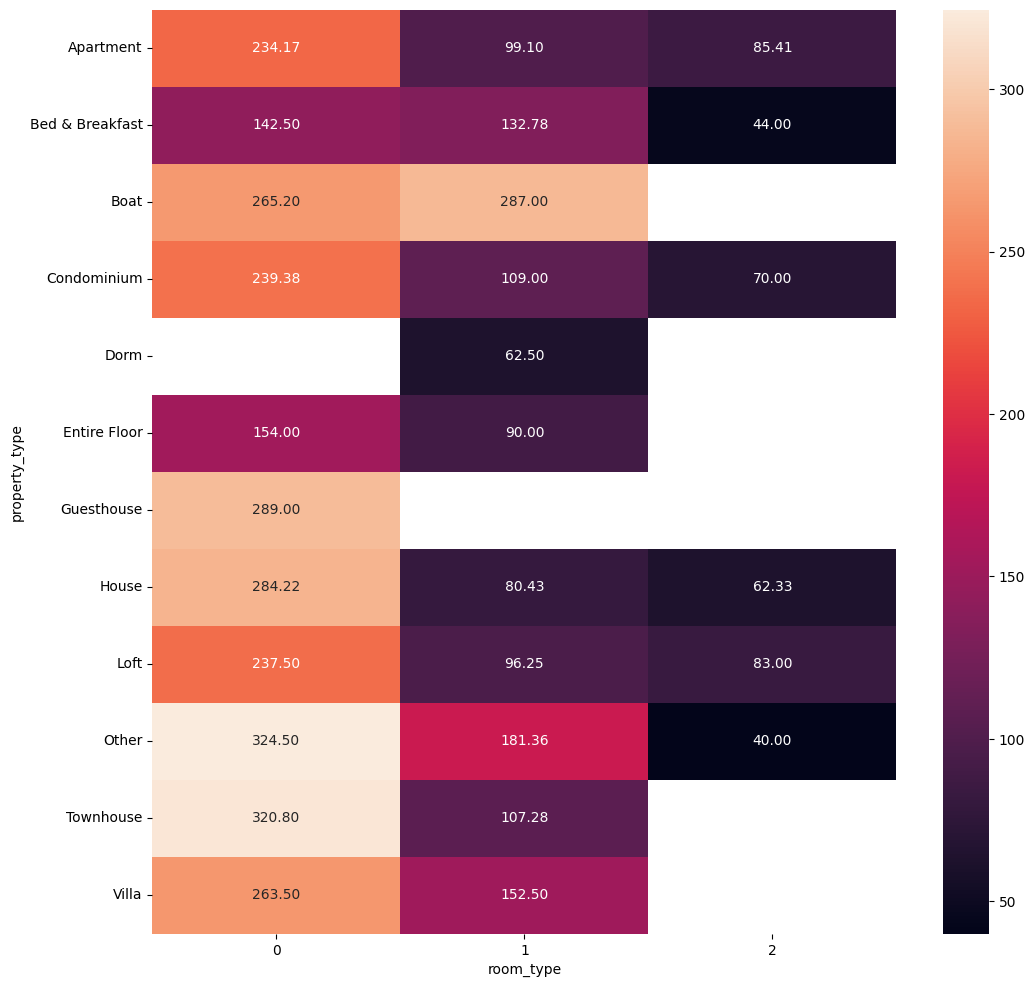

In [56]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['property_type', 'room_type']).price.mean().unstack(),annot=True, fmt=".2f");

<b>Room_type and Property</b> 

<b>Discussion:</b>  
1.The price of a shared room in Boston is lower than the price of both a entire and private room.

2.In Boston the Townhouse with entire room, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices.

3.This tells us that property type and room type play a very important role in determining the price of a property.

<b>Neighbourhood</b> 

1.The Boston neighbourhood distribution chart.

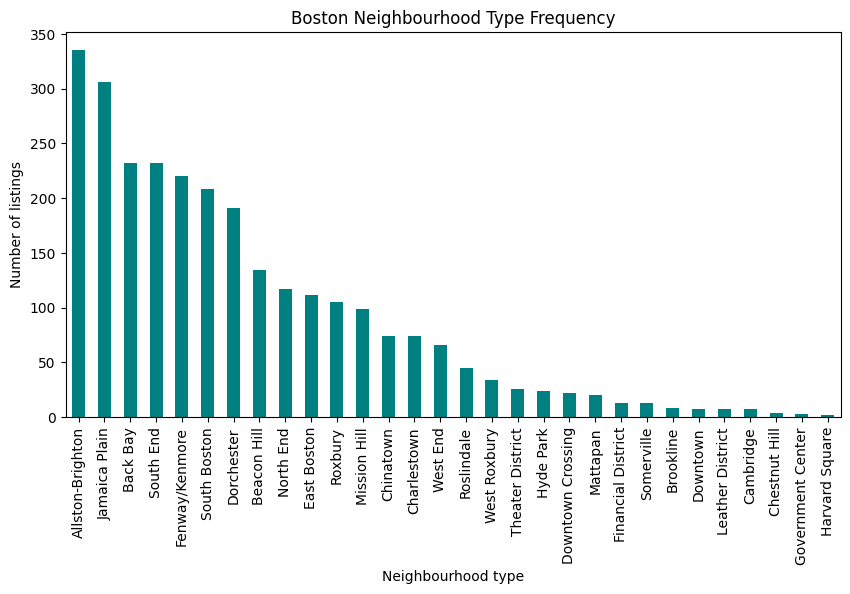

In [57]:
# clean property type column
features_df.neighbourhood.unique()
features_df = features_df[features_df.neighbourhood != 0]
# number of listings based on the property type
nei_type_count = features_df.neighbourhood.value_counts()
nei_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Neighbourhood Type Frequency')
plt.xlabel('Neighbourhood type');
plt.ylabel('Number of listings');

<b>Discussion:</b>  
The top five areas for Airbnb listings in Boston are Allston-Brighton, Jamaica Plain, Back Bay, South End, and FenwayKenmore, and as you can see from the bar chart, these are the five most popular areas for listings.

2.The mean price of each neighbourhood.

In [58]:
# analyzing the prices for different neighbourhood
prices_data = features_df.groupby(['neighbourhood']).price.mean().sort_values(ascending = False)
prices_data

neighbourhood
Harvard Square        359.000000
Financial District    283.692308
Downtown Crossing     283.318182
Back Bay              265.780172
Leather District      258.142857
Theater District      248.884615
Chinatown             240.527027
Fenway/Kenmore        240.045455
South Boston          233.149038
Beacon Hill           228.425373
West End              221.651515
South End             217.564655
Charlestown           212.418919
Government Center     205.333333
Downtown              203.142857
Cambridge             203.000000
North End             199.230769
Roxbury               145.114286
Jamaica Plain         141.437908
Brookline             130.375000
Mission Hill          129.080808
East Boston           123.482143
Allston-Brighton      114.498507
West Roxbury          110.588235
Roslindale            100.200000
Dorchester             98.225131
Hyde Park              95.708333
Somerville             93.076923
Mattapan               72.000000
Chestnut Hill          70.750

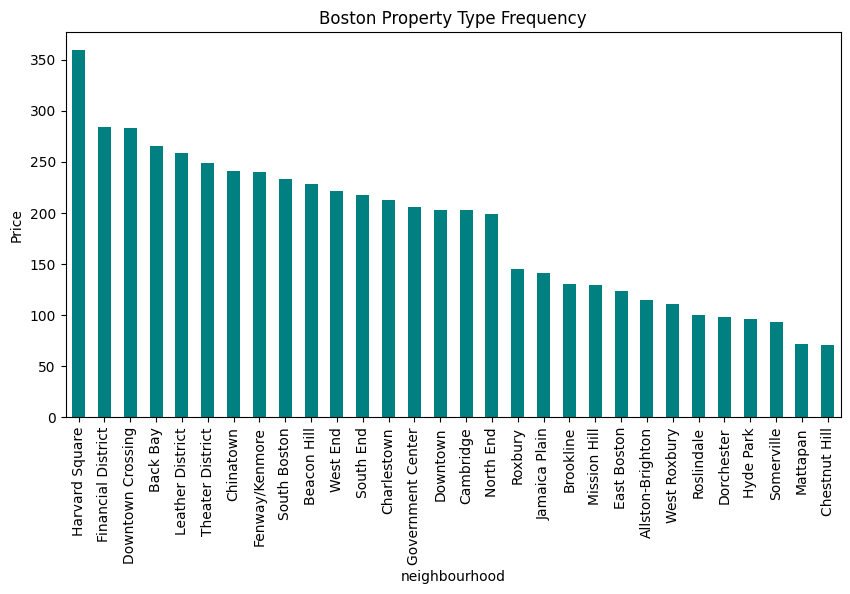

In [59]:
# number of listings based on the property type
prices_data.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('neighbourhood');
plt.ylabel('Price');

<b>Neighbourhood</b> 

<b>Discussion:</b>  
According to graph, Harvard Square is the most expensive neighbourhood city with $359 in Boston Airbnb followed by Financial District

<b>Amenities Num</b> 

1.Count the data in the amenities descriptions in the dataset to get the total number of devices for each listing.

In [60]:
from sklearn.preprocessing import MultiLabelBinarizer
# Change datatype:

amenities = listings_df.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])
amenities
mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)

In [61]:
# Combine ameamenities to listing data:
listings_df = pd.concat([listings_df, fit], axis = 1, sort = False)
listings_df.sample(5)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id,,,,,,,,,,,,,,,,,,,,,
14300921,https://www.airbnb.com/rooms/14300921,20160906204935,2016-09-07,Futon For You,"My place is close to Applebee's, Stop and Shop...",0,"My place is close to Applebee's, Stop and Shop...",none,0,0,...,1,0,0,1,1,0,0,1,0,0
14592644,https://www.airbnb.com/rooms/14592644,20160906204935,2016-09-07,New flat with a terrace in the heart of Cambridge,"Located in very center, between Harvard and MI...",0,"Located in very center, between Harvard and MI...",none,0,0,...,1,0,0,1,1,0,0,1,0,0
5521378,https://www.airbnb.com/rooms/5521378,20160906204935,2016-09-07,"Cozy bedroom near train, bus, parks","Room includes a single bed that expands, a big...","The condo has a newer kitchen and bath, dishwa...","Room includes a single bed that expands, a big...",none,"Jamaica Plain, Boston, MA Close to downtown, b...",No smoking indoors please. Outside smoking per...,...,1,0,0,0,1,0,0,1,0,1
8518665,https://www.airbnb.com/rooms/8518665,20160906204935,2016-09-07,Upscale 1BR w/ Skyline Views,This brand new unit in one of Boston's most de...,Enjoy views of downtown Boston through the flo...,This brand new unit in one of Boston's most de...,none,"Walking distance to Boston Common, Chinatown, ...",0,...,0,0,0,1,1,0,0,1,0,0
13636659,https://www.airbnb.com/rooms/13636659,20160906204935,2016-09-07,Quarters on Dot - hostel style unit,The STRB Quarters™ on DOT were completed in Ju...,"This unit features composite wood-flooring, a ...",The STRB Quarters™ on DOT were completed in Ju...,none,The location could not be more perfect with al...,he Quarters are designed to be interchangeable...,...,1,0,0,1,1,0,0,1,0,0


In [62]:
#The most popular 10 amenities
amenitie = fit
amenitie.sum().sort_values(ascending = False)[:10]

Wireless Internet    3115
Heating              3070
Kitchen              2978
Essentials           2764
Smoke Detector       2658
Air Conditioning     2538
Internet             2373
TV                   2350
Washer               2266
Dryer                2263
dtype: int64

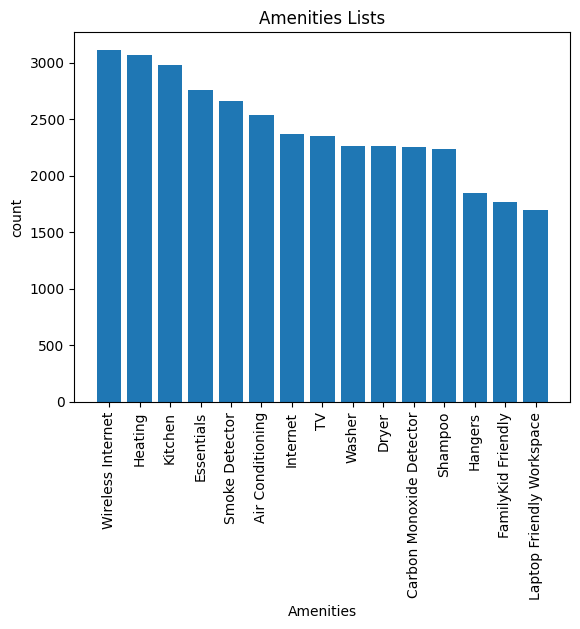

In [63]:
# Plot Amenities Lists:
amen = fit.sum().sort_values(ascending = False)[:15]
#plt.figure(figsize = [20,5])
plt.bar(amen.index, amen.values)
plt.title('Amenities Lists')
plt.xlabel('Amenities')
plt.ylabel('count')
plt.xticks(rotation = 90);

<b>Discussion:</b>  
As can be seen from the histogram, the top five most commonly provided equipment in Boston’s listings are wireless network, heating, kitchen, essentials and smoke detector.

In [64]:
listings_df['amenities_sum']=fit.sum(axis=1)
listings_df

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50,amenities_sum
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",0,...,0,0,1,1,0,0,1,0,0,15
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,0,0,1,1,0,0,1,0,0,21
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,0,0,1,1,0,0,1,1,1,18
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,0,0,1,1,0,0,1,0,0,23
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,0,0,0,0,0,0,1,0,0,14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8373729,https://www.airbnb.com/rooms/8373729,20160906204935,2016-09-07,Big cozy room near T,5 min walking to Orange Line subway with 2 sto...,0,5 min walking to Orange Line subway with 2 sto...,none,0,0,...,0,0,0,0,0,0,1,0,0,18
14844274,https://www.airbnb.com/rooms/14844274,20160906204935,2016-09-07,BU Apartment DexterPark Bright room,"Most popular apartment in BU, best located in ...",Best location in BU,"Most popular apartment in BU, best located in ...",none,0,0,...,1,0,1,1,0,0,1,0,0,24
14585486,https://www.airbnb.com/rooms/14585486,20160906204935,2016-09-07,Gorgeous funky apartment,Funky little apartment close to public transpo...,Modern and relaxed space with many facilities ...,Funky little apartment close to public transpo...,none,"Cambridge is a short walk into Boston, and set...","Depending on when you arrive, I can be here to...",...,0,0,0,0,0,0,0,1,1,2


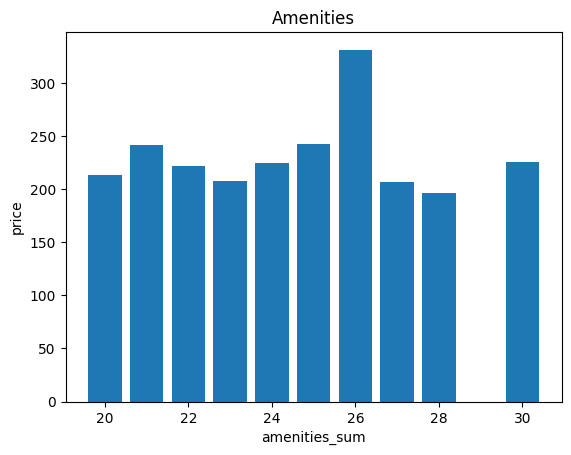

In [65]:
# The relationship between the number of facilities and the price.[Top 10]
plt.title('Amenities')
plt.xlabel('amenities_sum')
amen_score =  listings_df.groupby(['amenities_sum'])['price'].mean().sort_values(ascending = False)[:10]
plt.bar(amen_score.index, amen_score.values)
plt.ylabel('price');

<b>Discussion:</b>  
The figure shows that the number of devices with the top ten prices are all concentrated in higher areas.

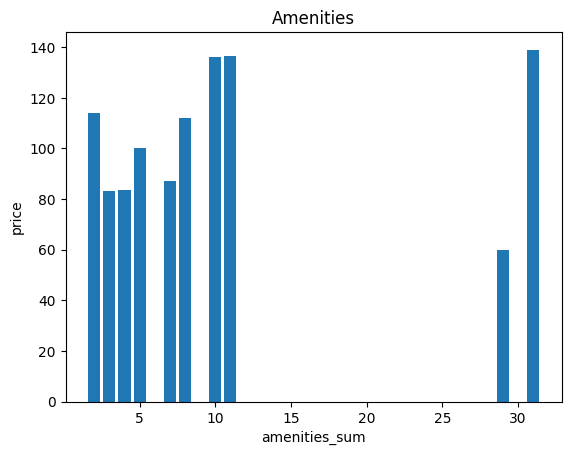

In [66]:
# The relationship between the number of facilities and the price.[Last 10]
plt.title('Amenities')
plt.xlabel('amenities_sum')
amen_score =  listings_df.groupby(['amenities_sum'])['price'].mean().sort_values(ascending = True)[:10]
plt.bar(amen_score.index, amen_score.values)
plt.ylabel('price');

<b>Amenities Num</b> 

<b>Discussion:</b>  
The figure shows that the number of devices with the last ten prices is concentrated in the lower area, from which we can also see two special values.

<b>bedrooms and bathrooms</b>

Relationship between price and number of bedrooms and bathrooms

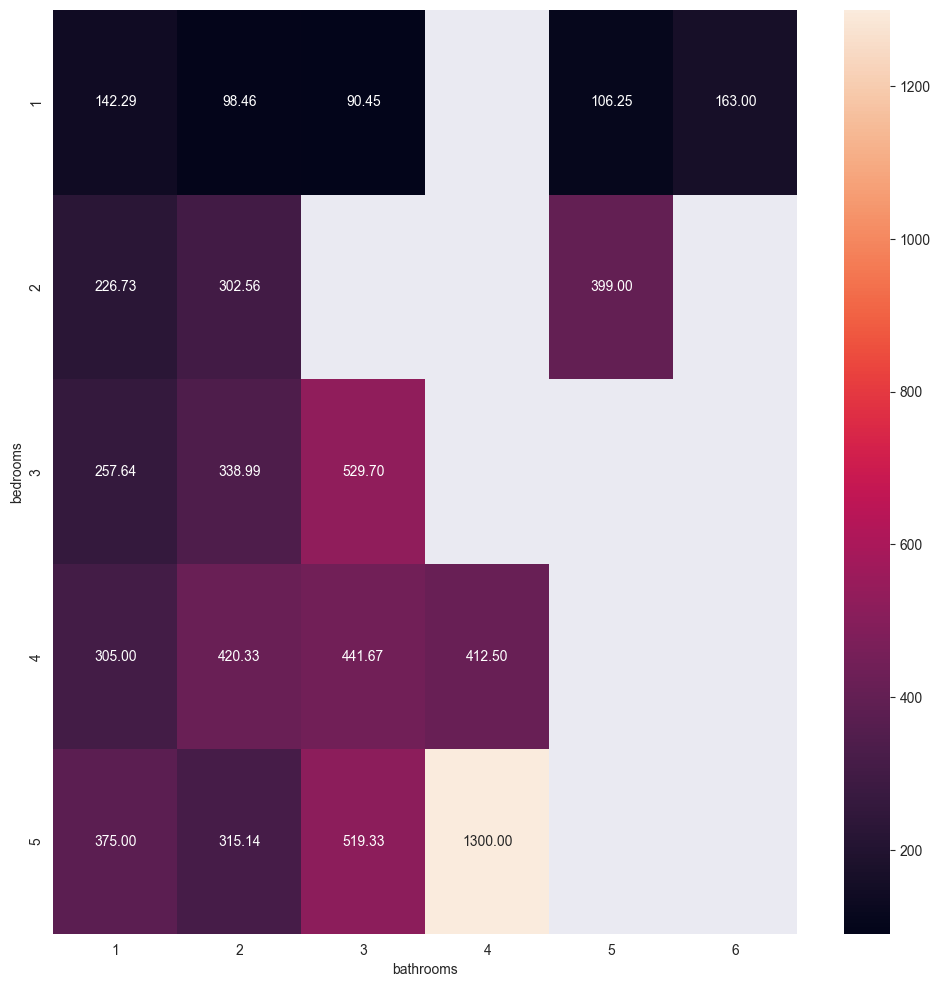

In [88]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(["bedrooms","bathrooms"]).price.mean().unstack(),annot=True, fmt=".2f");

<b>bedrooms and bathrooms</b> 

<b>Discussion:</b>  
It can be seen from the figure that the mean price of a listing increases with the number of bedrooms and the number of bathrooms.

<h2>Conclusion:</h2>
After combining all the data points collected from the above analysis, the following conclusions can be drawn:

Shares room are cheaper than entire rooms and private rooms, which means that listing an entire apartment on Airbnb will help generate the most revenue, and hosts should try to rent out their listings as a whole if they have one.

There will be a big gap in housing prices between neighbourhoods, and the average price in some neighbourhoods is much higher than others, so landlords can invest in more affluent neighbourhoods.

When the apartment has more amenities, there will be a higher rental price, which will help the landlord to obtain greater profits.

The average price of a house increases with the number of bedrooms and the number of bathrooms, so if the host wants to get a higher income, he can try to increase the number of these two.

Need to analyze how listing prices vary with seasons, this forms the next analysis, I'm trying to find out how prices vary with seasons, months, weeks, days

<h1>3. How to find the relationship between multiple variables and the price</h1>
<h2>Problem formulation:</h2>
Problem: The hosts are always looking for ways to make more money. We want to find out how dynamic pricing should be for hosts and how improvements could be made to make more profit.In order to maximise profits from dynamic pricing, we need to find which months of the year and days of the week had the most guests. In order to get a higher price for a house, it is important to find the relationship between multiple variables and the price such that hosts can improve on the variables that have a large positive relationship with the price to get a higher price.

1. Objective: To analyze the most popular time periods for the house and find the relationship between indepedent variables and the price

2. Input: Factors which might be relevant to price

3. Output: The model predicts the price and shows the each variable's correlation coefficient with the price
   
4. Evaluation methods: residuals histogram, R Square.  

<h2>Data preparation and Preprocessing pipeline:</h2>

In [61]:
# load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

calendar_jc = pd.read_csv('calendar.csv')
listings_jc = pd.read_csv('listings.csv')
reviews_jc = pd.read_csv('reviews.csv')

calendar_jc.head()
# convert date from string to datetime object
calendar_jc["date"] = pd.to_datetime(calendar_jc["date"])
calendar_jc.date.describe(datetime_is_numeric=True)

count                          1308890
mean     2017-03-07 00:00:00.000000256
min                2016-09-06 00:00:00
25%                2016-12-06 00:00:00
50%                2017-03-07 00:00:00
75%                2017-06-06 00:00:00
max                2017-09-05 00:00:00
Name: date, dtype: object

In [62]:
# convert f to 0 (not available), and t to 1 (available)
calendar_jc["available"]=calendar_jc["available"].apply(lambda x:1 if x=="t" else 0)
calendar_jc.available.value_counts()

0    665853
1    643037
Name: available, dtype: int64

<h2>Analyze availability</h2>
    
1. compute availability (percentage of units available) of to each day

In [63]:
# compute availability (percentage of units available) of to each day
# store in calendar_daily dataframe
#calendar_daily = calendar.groupby("date")["available"].mean().reset_index()

calendar_daily = calendar_jc.groupby("date")["available"].agg(["sum","mean"]).reset_index()

calendar_daily.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)                                         

calendar_daily.head()

,date,available_count,availability
0,2016-09-06,570,0.158951
1,2016-09-07,932,0.259900
2,2016-09-08,999,0.278583
3,2016-09-09,981,0.273564
4,2016-09-10,956,0.266592


2. view  overall trend of availability by day

C:\Users\28461\AppData\Local\Temp\ipykernel_24284\1401318121.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tickvalue)


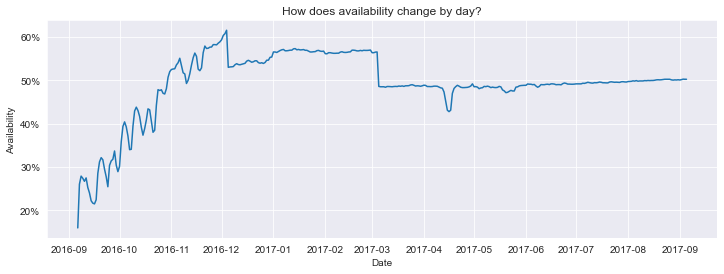

In [64]:
# view overall trend of availability by day
sns.set_style("darkgrid")
plt.figure(figsize=(12,4))

ax=sns.lineplot(x=calendar_daily.date,y=calendar_daily.availability)
ax.set(xlabel="Date",ylabel="Availability", title="How does availability change by day?")

# set y tick values to % 
y_tickvalue=['{:,.0f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)

# set x tick increments 
months = mdates.MonthLocator()
ax.xaxis.set_major_locator(months)

plt.savefig("availability_trend_daily.png")

3. Explore trend throught the week

In [65]:
# explore trend throughout the week
calendar_jc["day_of_week"] = calendar_jc["date"].dt.dayofweek
calendar_weekly = calendar_jc.groupby("day_of_week")["available"].agg(["sum","mean"]).reset_index()
calendar_weekly.rename(columns={"sum":"available_count","mean":"availability"},inplace=True)
calendar_weekly


,day_of_week,available_count,availability
0,0,92413,0.495586
1,1,93332,0.491071
2,2,91816,0.492385
3,3,91202,0.489092
4,4,90998,0.487998
5,5,91068,0.488374
6,6,92208,0.494487


C:\Users\28461\AppData\Local\Temp\ipykernel_24284\1593621846.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(y_tickvalue)


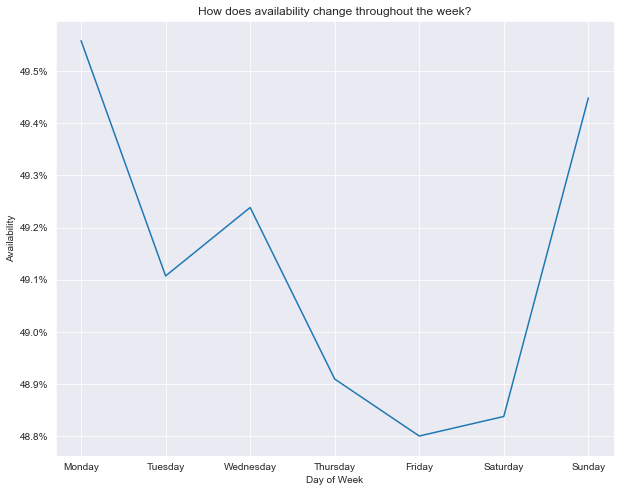

In [66]:
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_weekly.day_of_week,y=calendar_weekly.availability)
ax.set(xlabel="Day of Week",ylabel="Availability", title="How does availability change throughout the week?")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])

# set y tick values to % 
y_tickvalue=['{:,.1f}'.format(x*100) + '%' for x in ax.get_yticks()]
ax.set_yticklabels(y_tickvalue)
plt.savefig("availability_weekly.png")


<h2>Discussion:</h2>

The lowest availability during the week is on Friday and Saturday. This is mainly because people tend to go out at weekends.

On Fridays and Saturdays when there is a high demand for the house from guests, the hosts can raise the price to make more profit.

4. Check total available units

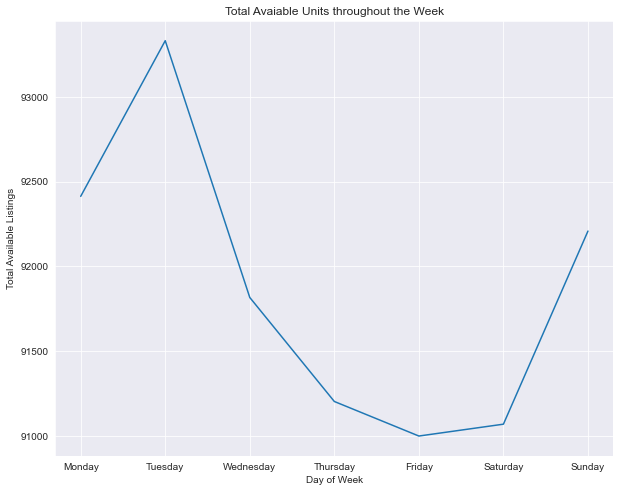

In [67]:
# Check total available units
plt.figure(figsize=(10,8))
sns.set_style("darkgrid")
ax=sns.lineplot(x=calendar_weekly.day_of_week,y=calendar_weekly.available_count)
ax.set(xlabel="Day of Week",ylabel="Total Available Listings", title="Total Avaiable Units throughout the Week")
ax.set_xticks([0,1,2,3,4,5,6])
ax.set_xticklabels(["Monday","Tuesday","Wednesday","Thursday","Friday","Saturday","Sunday"])


plt.savefig("available_count_weekly.png")

<h1>Model Description</h1>
A simple multiple linear  is best in training the model as we only want to find out the approximate relationship between price and other factors.
<h2>Multiple linear regression</h2>
Indepedent variables are hard to select. All variables that can probably influence the price are taken into account, both categorical and numerical.
1. select feature variables, and dro rows with one or more NAs. Dummy codes are created for categrorical values such that they can used in the regression.

In [74]:
# convert listing price from string to numeric
listings_jc["price"]=listings_jc["price"].replace('\$|\,','',regex=True).astype(float)
listings_jc["price"].describe()

count    3585.000000
mean      173.925802
std       148.331321
min        10.000000
25%        85.000000
50%       150.000000
75%       220.000000
max      4000.000000
Name: price, dtype: float64

In [75]:
# select feature variables, and drop rows with one or more NAs 

listings_rm_nan = listings_jc.dropna(how="any",subset=["neighbourhood_cleansed","bedrooms","bathrooms",
                                                   "room_type","review_scores_rating","beds"],axis=0)
y=listings_rm_nan["price"]

# create dummy codes for categorical values 
X_categorical = listings_rm_nan[["room_type","neighbourhood_cleansed"]]
X_categorical_dummy_coded = pd.get_dummies(X_categorical)

# check how many rows left after removing nans, check the number of columns 
X_categorical_dummy_coded.shape

(2751, 28)

In [76]:
print(listings_jc.beds)

0       3.0
1       1.0
2       1.0
3       2.0
4       2.0
       ... 
3580    1.0
3581    1.0
3582    1.0
3583    1.0
3584    1.0
Name: beds, Length: 3585, dtype: float64


2. select numerical values and concatenate categorical and numerical variables.

In [77]:
X_num = listings_rm_nan[["bedrooms","bathrooms","review_scores_rating","beds"]]

#concatenate columns of numerical and categorical features 
X=pd.concat([X_num,X_categorical_dummy_coded],axis=1)
# check to make sure X and y have equal number of rows
X.shape[0]==y.shape[0]

True

3. Split the data into training and testing dataset to fit the model.

In [78]:
# split X, y to test and train 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy.random as nr

nr.seed(9988)
indx = range(X.shape[0])
indx = train_test_split(indx, test_size = 0.2)

X_train = X.iloc[indx[0],:]
y_train = np.ravel(y.iloc[indx[0]])
X_test = X.iloc[indx[1],:]
y_test = np.ravel(y.iloc[indx[1]])

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
linear_model = LinearRegression()
linear_model.fit(X_train,y_train)
linear_model.score(X_test,y_test)
y_test_predicted = linear_model.predict(X_test)

4. Test the model

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


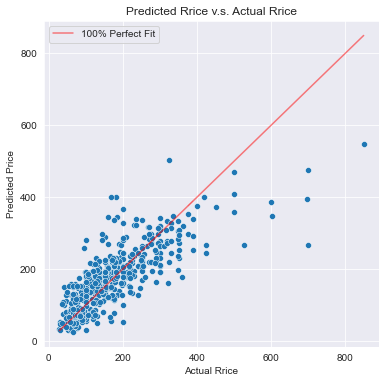

In [85]:
# plot y_test_predict and y_test
plt.figure(figsize=(6,6))
ax=sns.scatterplot(y_test,y_test_predicted)
sns.lineplot(x=y_test,y=y_test,ax=ax,color="r",alpha=0.5, label="100% Perfect Fit")
ax.set(xlabel="Actual Rrice",ylabel="Predicted Price", title="Predicted Rrice v.s. Actual Rrice")
plt.savefig("predicted_price_vs_actual_price.png",bbox_inches='tight')

<b>Discussion:</b>

Most data points are distributed around the regression line.

<h1>Result</h1>

In [80]:
import statsmodels.api as sm
results=sm.OLS(y_train,X_train).fit() #ordinary least squares 
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.624
Model:                            OLS   Adj. R-squared:                  0.619
Method:                 Least Squares   F-statistic:                     120.0
Date:                Tue, 27 Dec 2022   Prob (F-statistic):               0.00
Time:                        14:59:40   Log-Likelihood:                -12479.
No. Observations:                2200   AIC:                         2.502e+04
Df Residuals:                    2169   BIC:                         2.520e+04
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
==================================================================================================================
                                                     coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
bedrooms                                          50.1752      2.988     16.794      0.000      44.316      56.034
bathrooms                                         39.3812      3.579     11.002      0.000      32.362      46.401
review_scores_rating                               0.5741      0.162      3.550      0.000       0.257       0.891
beds                                              13.2913      2.049      6.486      0.000       9.273      17.310
room_type_Entire home/apt                          6.6670     14.419      0.462      0.644     -21.610      34.944
room_type_Private room                           -50.7038     14.281     -3.550      0.000     -78.710     -22.697
room_type_Shared room                            -75.0871     17.397     -4.316      0.000    -109.203     -40.971
neighbourhood_cleansed_Allston                   -37.5706      6.872     -5.467      0.000     -51.047     -24.094
neighbourhood_cleansed_Back Bay                   64.5784      6.337     10.190      0.000      52.150      77.006
neighbourhood_cleansed_Bay Village                46.9473     18.691      2.512      0.012      10.292      83.602
neighbourhood_cleansed_Beacon Hill                47.2726      7.109      6.649      0.000      33.331      61.214
neighbourhood_cleansed_Brighton                  -39.2741      7.480     -5.251      0.000     -53.942     -24.606
neighbourhood_cleansed_Charlestown                13.3108      9.599      1.387      0.166      -5.513      32.134
neighbourhood_cleansed_Chinatown                  36.7148     12.178      3.015      0.003      12.832      60.597
neighbourhood_cleansed_Dorchester                -56.3043      6.389     -8.812      0.000     -68.834     -43.775
neighbourhood_cleansed_Downtown                   56.5420      8.342      6.778      0.000      40.182      72.902
neighbourhood_cleansed_East Boston               -39.9121      7.395     -5.397      0.000     -54.415     -25.409
neighbourhood_cleansed_Fenway                     24.7695      6.714      3.689      0.000      11.603      37.936
neighbourhood_cleansed_Hyde Park                 -60.1301     14.794     -4.065      0.000     -89.142     -31.118
neighbourhood_cleansed_Jamaica Plain             -34.9895      6.100     -5.736      0.000     -46.953     -23.026
neighbourhood_cleansed_Leather District           12.0709     68.444      0.176      0.860    -122.152     146.294
neighbourhood_cleansed_Longwood Medical Area      -7.2757     39.635     -0.184      0.854     -85.003      70.452
neighbourhood_cleansed_Mattapan                  -60.6273     18.698     -3.242      0.001     -97.296     -23.959
neighbourhood_cleansed_Mission Hill              -34.3937      9.206     -3.736      0.000   

<h2>Discussion:</h2>

And then we can analyze the impact of each variable on prices looking at the coefficient.

It is obvious that increasing the number of rooms and beds has a positive impact on the price.

And review scores rating from guests seems to not have much impact on price.

As for the room type, it is better to be the type of Entire home/apt.

The neighbourhood of the house also has a significant impact on price.

To have a better price, it is recommended to place houses in a neighbourhood like Back Bay and South Boston Waterfront as they have high positive coefficients.

And to avoid lower prices, it is best to reduce the number of houses in neighbourhood such as Roxbury, Roslindale, and Mattapan, which all have high negative coefficients.

Mean Square Error      = 4064.722090575403
Root Mean Square Error = 63.75517304952911
Mean Absolute Error    = 43.58128351290183
Median Absolute Error  = 31.538430501115783
R^2                    = 0.641730515643641


D:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


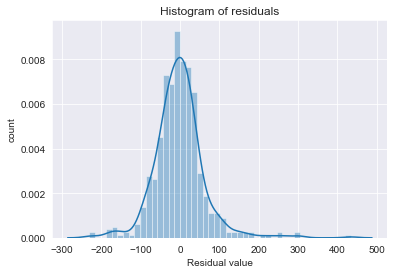

In [81]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))
    


def hist_resids(y_test, y_score):
    ## first compute vector of residuals. 
    resids = np.subtract(y_test.reshape(-1,1), y_score.reshape(-1,1))
    ## now make the residual plots
    # https://seaborn.pydata.org/generated/seaborn.distplot.html
    sns.distplot(resids)
    plt.title('Histogram of residuals')
    plt.xlabel('Residual value')
    plt.ylabel('count')
    plt.show()
    



print_metrics(y_test, y_test_predicted) 
hist_resids(y_test, y_test_predicted)  

<h2>Discussion:</h2>

We got a R^2 of 0.64, which is not particularly good but enough for relevant analysis.

Overall these results are reasonably good. Further, the distribution of the residuals is a bit skewed, but otherwise well behaved. 

In [82]:
linear_model.coef_

array([ 50.1752299 ,  39.38120435,   0.57414302,  13.29134913,
        46.37497513, -10.99586103, -35.3791141 , -32.80565869,
        69.34334991,  51.7122276 ,  52.03751676, -34.50918906,
        18.07571065,  41.47973415, -51.53937091,  61.30694812,
       -35.14713917,  29.53445998, -55.36518259, -30.22452281,
        16.83583543,  -2.51078878, -55.86231219, -29.6287353 ,
         8.38074514, -64.53311095, -19.36023919,   0.91626636,
        67.96868097,  44.64993025,   9.94254176, -60.69769744])

In [83]:
linear_model.intercept_

-44.47289559936905

# **4. How can Airbnb platform improve their competitiveness?**
# **Problem formulation:**


Problem: For rental platforms like Airbnb, data about the online behavior of their customers is probably the most important business asset. Through behavioral data analysis, platforms can extract deeper consumer information and present a more personalized experience to these customers. To enhance its competitiveness, a strong customer analytics is necessary for Airbnb to gaudging the health of the business. In this project, customer preference analysis is conducted to improve Airbnb's marketing decisions such as advertisements, recommendations and promotions.

1. Objective: To analyze the preferences of customers, and quantify the importantance of potential preferences to improve Airbnbs's marketing decisions. 

2. Input: Factors which involve the preferences of customers  

3. Output: The model which predicts the book rate, and the importance of the factors in the model.
   
4. Evaluation methods: MSE score and R2 score.  

# **Before constructing the model, some analysis is conducted by descriptiving the data in the dataset** 

## **`4.1. Analyze the price prefered by customers**

In [180]:
reviews_df = pd.read_csv('reviews.csv')
reviews_df.head()

# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)
reviews_df = reviews_df.dropna()
reviews_df.info()
reviews_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68222 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68222 non-null  int64         
 1   id             68222 non-null  int64         
 2   date           68222 non-null  datetime64[ns]
 3   reviewer_id    68222 non-null  int64         
 4   reviewer_name  68222 non-null  object        
 5   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.6+ MB


listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

Text(0, 0.5, 'Number of reviews')

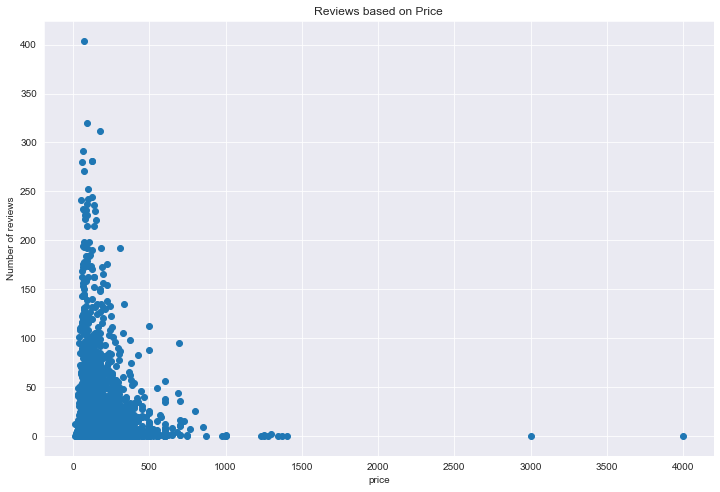

In [181]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

inputDF = pd.read_csv('listings.csv')
inputDF=inputDF[['number_of_reviews','price','review_scores_rating']]

# replacing NaN values with 0
inputDF.fillna(0, inplace=True)

#Extracting prices from the table
price = inputDF['price']
prices=[]

#clean the data to make it float
for p in price:
    p=float(p[1:].replace(',',''))
    prices.append(p)

#replace the price column with the new column
inputDF['price']=prices

price_review = inputDF[['number_of_reviews', 'price']].sort_values(by = 'price')

price_review.plot(x = 'price', 
                  y = 'number_of_reviews', 
                  style = 'o',
                  figsize =(12,8),
                  legend = False,
                  title = 'Reviews based on Price')

plt.xlabel("price")
plt.ylabel("Number of reviews")

**Discussion:** The above graph shows that listings with prices that range around 100-400 get the most reviews, probably because they are in the most reasonable price range. The number quickly declines as the price goes up. This indicates that customers prefer to the listing with price around 100-400.

## **`4.2. Analyze the season and day prefered by customers**

Text(0, 0.5, 'Number')

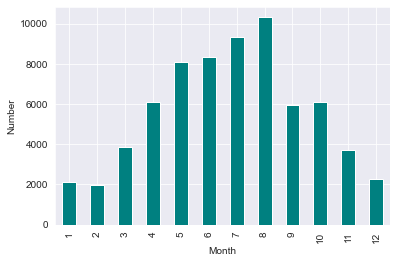

In [182]:
reviews_df['year'] = reviews_df['date'].dt.year
reviews_df['month'] = reviews_df['date'].dt.month
 
n_reviews_month = reviews_df.groupby('month').size()
n_reviews_month.plot(kind='bar',color='teal');
plt.xlabel('Month')
plt.ylabel('Number')

In [183]:
calendar = pd.read_csv('calendar.csv')

In [184]:
from pandas.api.types import CategoricalDtype

def sort_week_day(days):
    cats = [ 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

    cat_type = CategoricalDtype(categories=cats, ordered=True)
    week_day_sorted = pd.to_datetime(days[calendar.available == 'f']).dt.day_name().astype(cat_type)
    return week_day_sorted
    
only_dates = sort_week_day(calendar.date)
only_dates.value_counts()

Tuesday      96726
Friday       95474
Saturday     95404
Thursday     95270
Wednesday    94656
Sunday       94264
Monday       94059
Name: date, dtype: int64

Text(0, 0.5, 'Not available places')

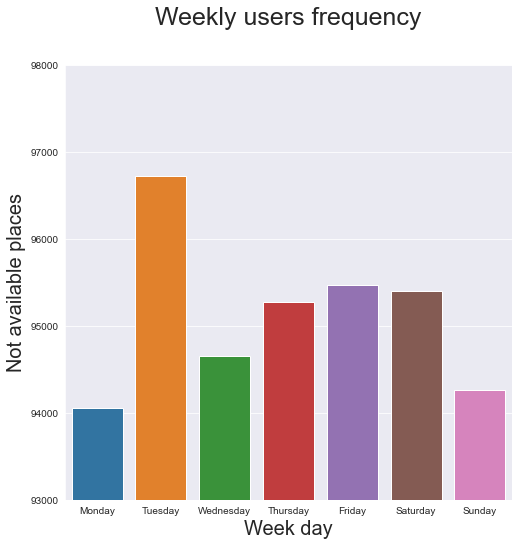

In [185]:
plt.figure(figsize=(8, 8))
sample_plot = sns.barplot(x=only_dates.value_counts().index, y=only_dates.value_counts())
sample_plot.set(ylim=(93000, 98000))
sample_plot.axes.set_title("Weekly users frequency", fontsize=25, pad=40)
sample_plot.set_xlabel("Week day",fontsize=20)
sample_plot.set_ylabel("Not available places",fontsize=20)

**Discussion:** The above graph shows that August and Tuesday have most reviews. This indicates that customers prefer to travel in August the on Tuesday.

## **`4.3. Analyze the kind of listing prefered by customers**

In [186]:
#load the data
list = pd.read_csv('listings.csv')
features_df = list.copy()
features_df.review_scores_rating.unique()

array([ nan,  94.,  98., 100.,  99.,  90.,  96.,  80.,  97.,  91.,  95.,
        88.,  92.,  87.,  93.,  73.,  82.,  20.,  89.,  81.,  78.,  74.,
        60.,  86.,  85.,  75.,  79.,  70.,  83.,  64.,  84.,  40.,  68.,
        67.,  48.,  58.,  62.,  76.,  77.,  71.,  65.,  53.,  47.,  72.,
        46.,  50.,  66.,  69.,  55.])

In [187]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [188]:
ratings_per_neighbourhood = features_df.groupby(['neighbourhood_cleansed', 'property_type']).review_scores_rating.mean()

In [189]:
ratings_per_neighbourhood.sort_values(ascending=False)

neighbourhood_cleansed  property_type  
Downtown                Boat               100.0
Brighton                Loft               100.0
Charlestown             Entire Floor       100.0
Bay Village             Townhouse          100.0
                        Guesthouse         100.0
                                           ...  
Fenway                  Bed & Breakfast      NaN
Jamaica Plain           Entire Floor         NaN
Longwood Medical Area   Loft                 NaN
Roxbury                 Entire Floor         NaN
                        Loft                 NaN
Name: review_scores_rating, Length: 132, dtype: float64

In [190]:
ratings_per_property_type = features_df.groupby('property_type').review_scores_rating.mean()
ratings_per_neighbourhood_type = features_df.groupby('neighbourhood_cleansed').review_scores_rating.mean()

In [191]:
ratings_per_property_type = ratings_per_property_type.dropna()
ratings_per_property_type

property_type
Apartment           91.514141
Bed & Breakfast     91.800000
Boat                91.454545
Condominium         94.451977
Dorm                86.500000
Entire Floor       100.000000
Guesthouse         100.000000
House               92.204593
Loft                96.312500
Other               88.111111
Townhouse           94.760870
Villa               99.500000
Name: review_scores_rating, dtype: float64

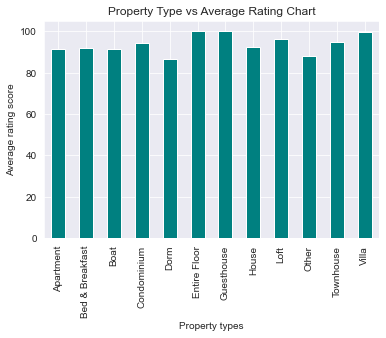

In [192]:
ratings_per_property_type.plot(kind='bar',color='teal');
plt.xlabel('Property types')
plt.ylabel('Average rating score')
plt.title('Property Type vs Average Rating Chart');

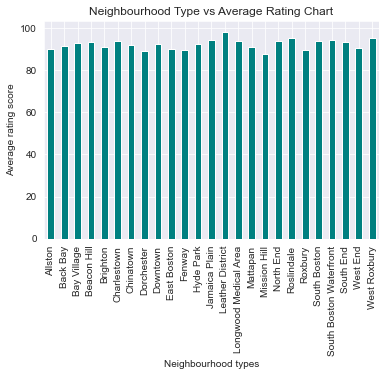

In [193]:
ratings_per_neighbourhood_type.plot(kind='bar',color='teal');
plt.xlabel('Neighbourhood types')
plt.ylabel('Average rating score')
plt.title('Neighbourhood Type vs Average Rating Chart');

Text(0.5, 1.0, 'Reviews based on neighbourhood and property type')

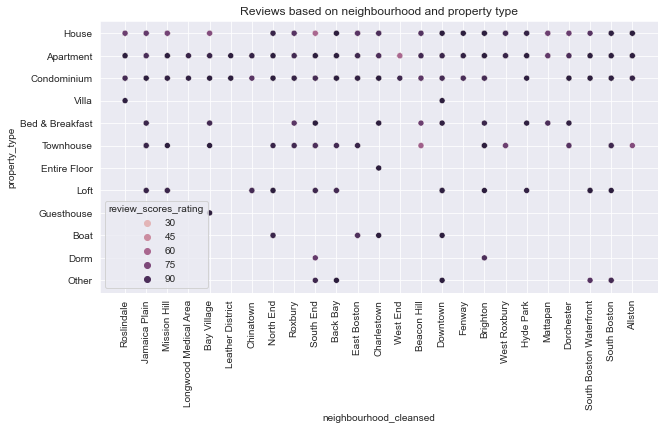

In [194]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='neighbourhood_cleansed', y='property_type', hue='review_scores_rating', data=features_df)
plt.xticks(rotation=90);
plt.title('Reviews based on neighbourhood and property type')

**Discussion:** The above graphs show that \"Entire Floor\" and \"Guesthouse\" and listings in Longwood Medical Area got the highest rating, probably because they give customers the best experience. However, the two factors cannot determine which kind of listing is prefered by customers. There are still some features which indicate the uesr preference, but human cannot detect them in the data, and we cannot find the most important features for we cannot quantify them, so we can employ machine learning techniques.



---



For the selection of listings, customer preference can be represented by the book rate quantitatively, so a model regarding to book rate can be introduced to predict user preference. For the book rate model, the response variable is the availibaility_365, the total number of day available in one year.The book rate can simply converted by: 1-availibaility_365/365.

# **Data preparation and preprocessing pipeline**

## **Data cleaning**

In [195]:
listings = pd.read_csv('listings.csv', delimiter = ',')

In [196]:
# keep the features which involve the decisions of customers
cols = ['id', 'host_id', 'host_since', 'last_scraped', 'host_response_time', 'host_response_rate', 'host_acceptance_rate', 
             'host_is_superhost', \
             'host_identity_verified', 'neighbourhood_cleansed', 'city', 'neighbourhood_group_cleansed', \
             'latitude', 'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms', \
             'bedrooms', 'beds', 'bed_type', 'square_feet', 'price', 'weekly_price', \
             'monthly_price', 'security_deposit', 'cleaning_fee', 'guests_included', 'extra_people', \
             'minimum_nights', 'maximum_nights', 'has_availability', 'availability_365', 'number_of_reviews', \
             'first_review', 'review_scores_rating', 'review_scores_accuracy', 'review_scores_cleanliness', \
             'review_scores_checkin', 'review_scores_communication', 'review_scores_value', 'requires_license', \
             'license', 'instant_bookable', 'cancellation_policy', 'require_guest_profile_picture', \
             'require_guest_phone_verification', 'calculated_host_listings_count', 'reviews_per_month']
cleaned_list = listings[cols]

In [197]:
# drop high-NaN columns
cleaned_list = cleaned_list.drop(labels = ['license', 'square_feet', 'monthly_price', 'weekly_price', \
                                           'has_availability', 'neighbourhood_group_cleansed'], axis = 1)

In [198]:
def parse_dollar(x):

    if x is np.nan:
        return 0
    elif isinstance(x, str):
        return float(x[1:-3].replace(",", ""))
    else:
        return x

def parse_percentage(x):

    if isinstance(x, str):
        return float(x[0:-1])
    else:
        return x

# formatting from string to the correct format
cleaned_list['security_deposit'] = cleaned_list['security_deposit'].apply(parse_dollar)
cleaned_list['cleaning_fee'] = cleaned_list['cleaning_fee'].apply(parse_dollar)
cleaned_list['price'] = cleaned_list['price'].apply(parse_dollar)
cleaned_list['extra_people'] = cleaned_list['extra_people'].apply(parse_dollar)
cleaned_list['host_response_rate'] = cleaned_list['host_response_rate'].apply(parse_percentage)
cleaned_list['host_acceptance_rate'] = cleaned_list['host_acceptance_rate'].apply(parse_percentage)
cleaned_list['last_scraped'] = pd.to_datetime(cleaned_list['last_scraped'])
cleaned_list['host_since'] = pd.to_datetime(cleaned_list['host_since'])

Text(0, 0.5, 'Row Count')

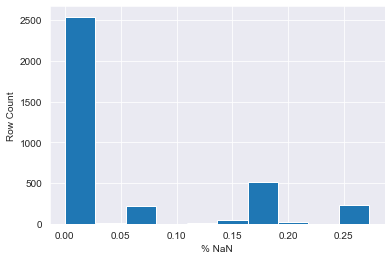

In [199]:
# create a column to flag if the row contain any NaN value
cleaned_list['has_NaN'] = (cleaned_list.isnull().sum(axis = 1)/cleaned_list.shape[1]) > 0
# plot NaN distribution
nan_rows = (cleaned_list.isnull().sum(axis = 1)/cleaned_list.shape[1]).sort_values(ascending = False)
ax = nan_rows.hist()
ax.set_xlabel("% NaN")
ax.set_ylabel("Row Count")

In [200]:
# drop data containing any missing values
dropped_list = cleaned_list.iloc[nan_rows[(nan_rows==0)].index.tolist(), :].reset_index(drop = True)
nan_list = cleaned_list.iloc[nan_rows[(nan_rows>0)].index.tolist(), :].reset_index(drop = True)
print("All data with any missing value has been dropped")

All data with any missing value has been dropped


In [216]:
# replace missing values with the most frequent value in the column

def impute_mode(df, variable):

    # find most frequent category
    most_frequent_category = df.groupby([variable])[variable].count().sort_values(ascending=False).index[0]
    
    # replace NA
    df[variable].fillna(most_frequent_category, inplace=True)
    
impute_cols = cleaned_list.columns[cleaned_list.isnull().any()]
for col in impute_cols:
    impute_mode(cleaned_list, col)

In [217]:
# convert the availability to booking rate
cleaned_list['booked_365'] = cleaned_list['availability_365'].apply(lambda x: (365 - x)/365*100)


from datetime import datetime

# calculate the day difference based the two dates: host_since and last_scrape
def day_diff(df):
    
    if ('last_scraped' in df.columns) & ('host_since' in df.columns):
        df['host_days'] = (pd.to_datetime(df['last_scraped']) - pd.to_datetime(df['host_since'])).apply(lambda x: x.days)
    else:
        print('Error: Date column does not exist in the dataset!')
        
# return day of the week based on the date provide       
def date2day(x):
    
    if isinstance(x, datetime):
        return x.isoweekday()
    else:
        return x

    
day_diff(cleaned_list)

# # convert date to day
# cleaned_list['day'] = cleaned_list.last_scraped.apply(date2day)

# drop unnecessary columns in modeling the host booking rate
feature_to_drop = ['id', 'host_id', 'latitude', 'longitude', 'city', \
                   'host_since', 'last_scraped', 'first_review', 'requires_license', 'availability_365']
processed_list = cleaned_list.drop(labels = feature_to_drop, axis = 1)

In [218]:
# Convert host_response_time to integer numbers
def engineer_host_response_time(x):

    if x == 'within an hour':
        return 1
    elif x == 'within a few hours':
        return 2
    elif x == 'within a day':
        return 3
    elif x == 'a few days or more':
        return 4
    else:
        return x

# Convert cacellation_policy to ordinal number    
def engineer_cancellation_policy(x):

    if x == 'flexible':
        return 1
    elif x == 'moderate':
        return 2
    elif x == 'strict':
        return 3
    elif x == 'super_strict_30':
        return 4
    else:
        return x


processed_list.host_response_time = processed_list.host_response_time.apply(engineer_host_response_time)
processed_list.cancellation_policy = processed_list.cancellation_policy.apply(engineer_cancellation_policy)

In [219]:
# convert string 't' and 'f' to 1 and 0
def encode_binary(x):
    
    if x == 'f':
        return 0
    elif x == 't':
        return 1
    else:
        return x

processed_list.host_is_superhost = processed_list.host_is_superhost.apply(encode_binary)
processed_list.host_identity_verified = processed_list.host_identity_verified.apply(encode_binary)
processed_list.instant_bookable = processed_list.instant_bookable.apply(encode_binary)
processed_list.require_guest_profile_picture = processed_list.require_guest_profile_picture.apply(encode_binary)
processed_list.require_guest_phone_verification = processed_list.require_guest_phone_verification.apply(encode_binary)

## **Data preprocessing**

In [220]:
cat_features = ['neighbourhood_cleansed', 'property_type', 'room_type', 'bed_type']
processed_list = pd.get_dummies(data = processed_list, columns = cat_features)

# **Model description**

Based on previous work, Random Forest Clssifier is best in training the model, but the parameters are difficult to choose. In order to select the appropriate parameters, GridSearch() is defined to find the optimal parameters automatically First, we define these models and obtain them from sklearn.
Here is the description for Random Forest Classifier:   
* <b>RandomForestClassifier</b>     
This is an integrated learning method that works by training multiple decision trees on a training set and then combining their predictions to produce a final prediction. Random forests usually perform well on high-dimensional datasets and can handle non-linear relationships well.   

In [221]:
def GridSearch(X_train, X_test, y_train, y_test, criterion = ['mse'], n_estimators = [300, 600],
                  method = 'GBDT', learning_rate = 0.5, validate = False, cv = 5,
                  max_features = ['auto'], max_depth = [10, 20, 40], min_samples_leaf = [2,4], n_jobs = -1):
    '''
    Usage: use gridsearch to find optimal parameters for the random forest (RF) regressor.
    Input: training and testing sets from X and y variables
    Output: the best regressor
    '''
       
    clf = RandomForestRegressor(random_state=42, n_jobs = n_jobs)
        
    parameters = {'criterion': criterion,
                  'n_estimators': n_estimators,
                  'max_depth': max_depth,
                  'min_samples_leaf':min_samples_leaf,
                  'max_features':max_features
                 }
    
    #Use gridsearch to find the best-model parameters.
    grid_obj = GridSearchCV(clf, parameters, cv = cv)
    grid_fit = grid_obj.fit(X_train, y_train)
    
    #obtaining best model, fit it to training set
    best_clf = grid_fit.best_estimator_
    best_clf.fit(X_train, y_train)

    # Make predictions using the new model.
    best_train_predictions = best_clf.predict(X_train)
    print('The training MSE Score is', mean_squared_error(y_train, best_train_predictions))
    print('The training R2 Score is', r2_score(y_train, best_train_predictions))
    
    if validate:
        best_test_predictions = best_clf.predict(X_test)
        print('The testing MSE Score is', mean_squared_error(y_test, best_test_predictions))
        print('The testing R2 Score is', r2_score(y_test, best_test_predictions))
    return best_clf

# **Experiments**

## **1. Define the model**

In [222]:
# select features used for modeling
data = processed_list.copy()
drop_cols = ['reviews_per_month', 'calculated_host_listings_count','review_scores_accuracy',
             'review_scores_cleanliness', 'review_scores_checkin', 'review_scores_communication', 
             'review_scores_value']

data.drop(labels = drop_cols, axis = 1, inplace = True)

## apply feature scaling
scaler = StandardScaler()
data_transformed = pd.DataFrame(data = scaler.fit_transform(data), index = data.index, columns = data.columns)
X_transformed = data_transformed.drop(labels = ['booked_365'], axis = 1)
y_transformed = data_transformed[['booked_365']].iloc[:,0]
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y_transformed, test_size = 0.3, random_state = 42)

criterion = ['squared_error']
method = 'RF' 
n_estimators =  [200, 400]
max_features = [30, 50, 70] 
max_depth = [10, 20, 40] 
min_samples_leaf = [2,4]
learning_rate = 0.001

# **2. Get the best model**

In [223]:

best_clf = GridSearch(X_train, X_test, y_train, y_test, method = method, learning_rate = learning_rate, \
                         criterion = criterion, n_estimators = n_estimators, \
                         max_features = max_features, max_depth = max_depth, min_samples_leaf = min_samples_leaf)

The training MSE Score is 0.15952228848511027
The training R2 Score is 0.8401485756240699


# **Results**

<AxesSubplot:ylabel='feature'>

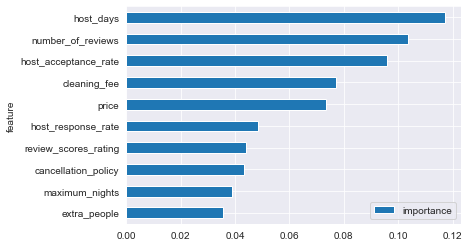

In [224]:
importances = best_clf.feature_importances_ 
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result.sort_values(by='importance',ascending=True)[-10:].plot(x='feature', y='importance', kind='barh')

# **Discussion**

The Book rate model above indicates top 10 customer preferences that AirBnB customers evaluate when choosing the homestay among the listings. In general, they prefer the following listings:

*   listings with high hosts credit
*   listings with good hosts communications
*   listings with high ratings, including the number of review, and the overall review score
*   listing with reasonable price

In summary, customers tend to choose the listing with more reviews and good rating score. They also prefer experienced hosts, and appreciate a smooth communication with the host. Last but not least, price is the key factor that finalizes their decisions.

In order to improve the competitiveness, Airbnb should always improve its marketing decisions, from the abovementioned analysis, It should advertise, recommend, and promote their listings in a way that customers prefer. For example, the platform should recommend the listings which are good in the top features of the model, promote its travel package in August. The platform can also ignore the unimportant features when it makes marketing decision.

#lei

In [1]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# 5
<h1>Problem formulation: </h1> 
Problem: Only the total rating for each house type is available in the dataset. However, for the Airbnb platform, feedback from individual users is also extremely important. We can know the bad host from the negative review ratio, and can get more information from negative feed information.

1: Objective: To achieve a ranking of the positive ratings of properties based on the positive feedback from individual users. Also, to recommend appropriate listings for customers with too many bad reviews.    

2: Input: user reviews, data type is text data.    

3: Output: prediction of the positivity of user reviews, user reviews are labeled as positive, positive as 1, negative as 0.   

4: Evaluation methods: accuracy, precision, recall, F1 score.  

<h1>Data preparation and Preprocessing pipeline:</h1>

<h2>Data cleaning part</h2>

1. read the data from csv file and display it

In [2]:
review_df = pd.read_csv("reviews.csv")

In [3]:
review_df

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...
...,...,...,...,...,...,...
68270,7462268,80537457,2016-06-18,22034145,Antonio,Joe y su mujer son encantadores. La habitación...
68271,7462268,83640094,2016-07-03,40052513,Steve,Joe was on his way to Jamaica to be married! o...
68272,7462268,85797088,2016-07-13,77129134,Nick,The room was very clean as were the bathrooms ...
68273,7462268,97264637,2016-08-26,15799803,Vid,Staying in Lower Allston at Joe and Nancy's pl...


2. Select the appropriate data type

In [4]:
review_df['comments'] = review_df['comments'].astype(str)
review_df.date = pd.to_datetime(review_df.date)

3. drop null value

In [5]:
review_df.dropna(inplace=True)
review_df.info()
review_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 0 to 68274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   id             68275 non-null  int64         
 2   date           68275 non-null  datetime64[ns]
 3   reviewer_id    68275 non-null  int64         
 4   reviewer_name  68275 non-null  object        
 5   comments       68275 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 3.6+ MB


listing_id       0
id               0
date             0
reviewer_id      0
reviewer_name    0
comments         0
dtype: int64

4. use a language detect package to delete the non-english sentences

In [6]:
import langdetect

def is_english(text):
    try:
        return langdetect.detect(text) == "en"
    except:
        return False

review_df = review_df[review_df["comments"].apply(is_english)]
review_df = review_df[review_df['comments'].apply(lambda x: len(x.split()) >= 5)]

5. delete stop words which have no contribution to the sentence meaning

In [7]:
def clean_comment(text):
    text = re.sub(r"[^\w\s]", "", text).lower()
    tokens = text.split()
    stopwords = ["a", "an", "the", "and", "but", "if", "or", "because", "as", "what", "which", "this", "that", "these", "those", "then", "just", "so", "than", "such", "both", "through", "about", "for", "is", "of", "while", "during", "to", "What", "Which", "Who", "How", "Whom", "The"]
    tokens = [token for token in tokens if token not in stopwords]
    
    # Return the cleaned and preprocessed review text
    return " ".join(tokens)

In [8]:
review_df["comments"] = review_df["comments"].apply(clean_comment)

<h2>Data processing</h2>

1. Combine room reviews from same listings together according to the listing id.

In [9]:
grouped = review_df.groupby('listing_id')
aggregated_comments = grouped['comments'].apply(lambda x: ''.join(x))
aggregated_review_df = pd.DataFrame({'listing_id': aggregated_comments.index, 'comments': aggregated_comments.values})

2. Combine the rating and description data from listing dataframe

In [10]:
listings_df = pd.read_csv('listings.csv')
listings_df.fillna(0, inplace=True)
listings_df = listings_df.rename(columns={"id": "listing_id"})


In [11]:
aggregated_review_df = pd.merge(aggregated_review_df, listings_df[['listing_id', 'review_scores_rating', 'description']], on="listing_id")
aggregated_review_df = aggregated_review_df[aggregated_review_df["review_scores_rating"] != 0]


3. plot the figure to check the distribution of ratings

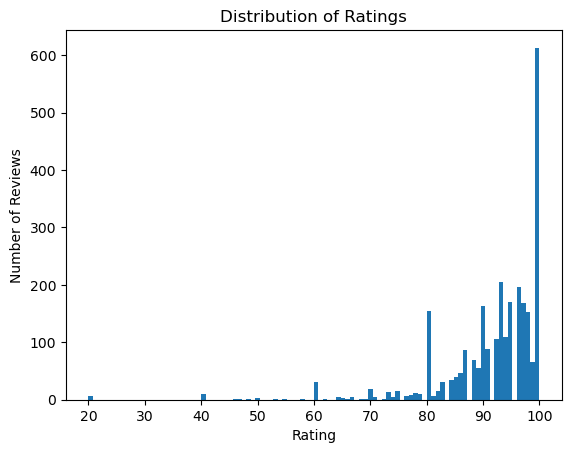

In [12]:
plt.hist(aggregated_review_df['review_scores_rating'], bins=100)
plt.xlabel('Rating')
plt.ylabel('Number of Reviews')
plt.title('Distribution of Ratings')
plt.show()


<b>Discussion:</b>  
From the histogram we can see that the most selected rating is 100, and most of the ratings are located above 90. In order to distinguish between positive and negative reviews, we positioned the house reviews with a score of 90 or higher as positive reviews.  
4. Label the rating positiveness

In [13]:
def is_positive(x):
    if x >= 90:
        return 1
    else:
        return 0

aggregated_review_df['positive'] = aggregated_review_df['review_scores_rating'].apply(is_positive)

<h1>Model description</h1>

1. In order to select the appropriate model, four models were selected simultaneously to test the accuracy on the data. First, we define these models and obtain them from sklearn.
Here is the description for selected models:  
* <b>MultinomialNB</b>     
This is a plain Bayesian classifier for polynomial data. It assumes that all features are independent of each other and uses probabilities to predict the classification of the target variable.MultinomialNB is often used for text classification because it works well with digitized text data.  
* <b>RandomForestClassifier</b>     
This is an integrated learning method that works by training multiple decision trees on a training set and then combining their predictions to produce a final prediction. Random forests usually perform well on high-dimensional datasets and can handle non-linear relationships well.  
* <b>KNeighborsClassifier</b>    
This is an instance-based learning method that predicts the class of a test sample by computing the distance between the test sample and the training sample. kNeighborsClassifier is typically used for classification and regression problems and handles nonlinear relationships well.  
* <b>BernoulliNB</b>  
This is also a plain Bayesian classifier, similar to MultinomialNB, but it assumes that the features are binary, i.e., they have only two possible values (0 or 1).BernoulliNB is usually used for text classification because it can handle binary word bags well.  

In [14]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB

In [15]:
models = [
    BernoulliNB(),
    MultinomialNB(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
]

classifier_Names = ['BernoulliNB', 'MultinomialNB',
                    'KNeighborsClassifier', 'RandomForestClassifier']

<h1>Experiments</h1>

1. Check the sample distribution to prevent unbalanced

In [16]:
counts = aggregated_review_df['positive'].value_counts()
print(counts)

1    2037
0     711
Name: positive, dtype: int64


2. Define training dataset and  test dataset

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(aggregated_review_df['comments'])
y = aggregated_review_df['positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

3. Model test

In [18]:
from sklearn.metrics import accuracy_score


for name, model in zip(classifier_Names, models):
    model.fit(X_train, y_train)
    pre_labels = model.predict(X_test)
    score = accuracy_score(y_test, pre_labels)
    print('%s: %.2f' % (name, score))

BernoulliNB: 0.74
MultinomialNB: 0.74
KNeighborsClassifier: 0.71
RandomForestClassifier: 0.78


<b>Discussion:</b>  
Random Forest get the best results, so we select this as the model to predict our results

4. Define the final selected model and train

In [19]:
from sklearn.naive_bayes import MultinomialNB
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(aggregated_review_df['comments'])
y = aggregated_review_df['positive']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = RandomForestClassifier()
model.fit(X_train, y_train)

RandomForestClassifier()

<h1>Results</h1>

1. Use the metrics.classification_report method the results.

In [20]:
from sklearn import metrics
own_model_result = model.predict(X_test)
print(metrics.classification_report(y_test, own_model_result))

              precision    recall  f1-score   support

           0       0.96      0.16      0.28       142
           1       0.77      1.00      0.87       408

    accuracy                           0.78       550
   macro avg       0.87      0.58      0.57       550
weighted avg       0.82      0.78      0.72       550



<b>Discussion:</b>  
* <b>precision:</b>   
This is an indicator of the precision rate, which indicates the percentage of samples predicted to be in a given category that actually belong to that category. For example, a precision of 1.00 for predicting category 0 means that all samples predicted as category 0 actually belong to category 0.  
* <b>recall:</b>   
This is an indicator of recall and indicates the proportion of samples that belong to a given category that are predicted to be in that category. For example, a recall of 1.00 for predicting category 1 means that all samples belonging to category 1 are correctly predicted as category 1.  
* <b>f1-score:</b>   
This is the f1-score metric, which is the summed average of the precision and recall rates. f1-score helps you understand how well the classifier balances precision and recall.  
* <b>support:</b>   
This is the number of samples per category.  
* <b>accuracy:</b>   
This is the accuracy of the classifier and indicates the percentage of samples where the category predicted by the classifier is the same as the actual category.  
* <b>macro avg:</b>   
This is the macro average of the categories and represents the average of the metrics for each category. In this case, the macro average precision is 0.89, the macro average recall is 0.58, and the macro average f1 score is 0.58.

* <b>weighted avg:</b>   
This is the weighted average, which represents the average of the metrics for each category multiplied by their sample size in the dataset and then the sum is calculated. In this case, the weighted average precision is 0.83, the weighted average recall is 0.79, and the weighted average f1 score is 0.72.  

According to the classification report, your classifier performs better in predicting samples with category 0, as its precision rate is 1.00, recall rate is 0.16, and f1 score is 0.28. However, it performs worse in predicting samples with category 1, as its precision rate is 0.78, recall rate is 1.00, and f1 score is 0.88. Overall, the classifier has an accuracy rate of 0.79. The macro average precision and recall were 0.89 and 0.58, respectively, and the weighted average precision and recall were 0.83 and 0.79, respectively.

2. To further evaluate the model results, we use ROC diagram and AUC value.

In [21]:
X_res = vectorizer.fit_transform(aggregated_review_df['comments'])
predictions = [round(i[1], 5) for i in model.predict_proba(X_res)]
aggregated_review_df['predict_positive'] = predictions

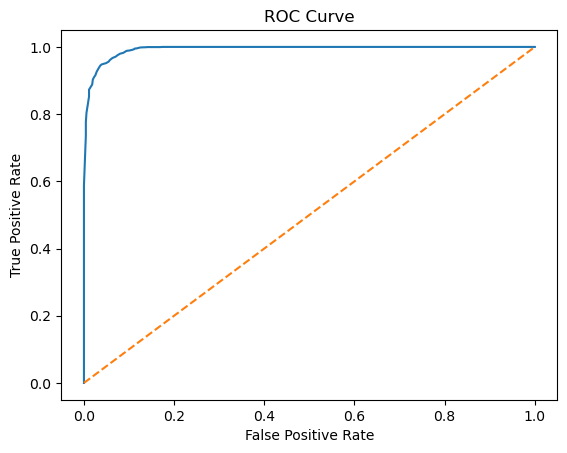

0.9928861767567235


In [22]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(aggregated_review_df['positive'], aggregated_review_df['predict_positive'])
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc = roc_auc_score(aggregated_review_df['positive'], aggregated_review_df['predict_positive'])
print(auc)

<b>Discussion:</b>  
In general, our model has a good performace in positive prediction. So we can know that the rating is related to the review.

5. Prediction for evey single review.

In [23]:
X_sep = vectorizer.transform(review_df['comments'])
prediction_sep = model.predict(X_sep)
review_df['score'] = prediction_sep

In [24]:
counts = review_df['score'].value_counts()
print(counts)

1    62879
0     1019
Name: score, dtype: int64


<b>Discussion:</b>  
From the model results, there are 63186 positive review and 718 negative review.

6. Get the positive review ratio for each listing_id.

In [25]:
review_df_counts_listing = review_df.groupby("listing_id")["score"].mean()
review_df_counts_listing = review_df_counts_listing.reset_index()
review_df_counts_listing = review_df_counts_listing.rename(columns={"score": "ratio"})
review_df_counts_listing

,listing_id,ratio
0,3353,0.939394
1,5506,1.000000
2,6695,1.000000
3,6976,1.000000
4,8792,1.000000
...,...,...
2800,14813006,1.000000
2801,14823724,1.000000
2802,14842237,1.000000
2803,14843050,1.000000


In [26]:
review_df[review_df["score"] == 0]['comments']

24       we didnt meet izzy at all after we arrived nob...
36       ok stay perhaps best on youngadventurous side ...
497      please read review carefully i feel it my resp...
530      tough place review on plus side cost location ...
566      overall we are not satisfied with accommodatio...
                               ...                        
67541    first off our experience with property managem...
67543    host canceled reservation 41 days before arriv...
67789    host canceled reservation 298 days before arri...
68038    i was quite disappointed in my stay at roberts...
68256    joe was great host he was there at agreed time...
Name: comments, Length: 1019, dtype: object

7. Display the negative review word cloud

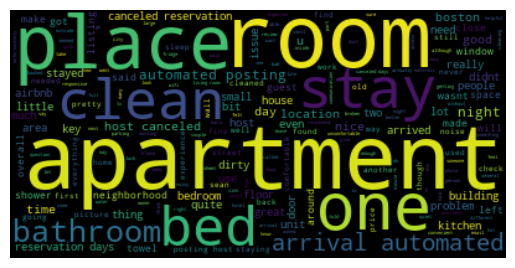

In [35]:
from wordcloud import WordCloud
review_df_zero_score = review_df[review_df["score"] == 0]
comments_text = " ".join(review_df_zero_score["comments"])
wordcloud_neg = WordCloud().generate(comments_text)

# Display the wordcloud
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis("off")
plt.show()

8. Display the positive review word cloud

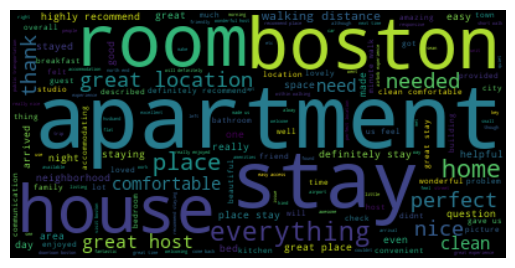

In [37]:
review_df_one_score = review_df[review_df["score"] == 1]
comments_text = " ".join(review_df_one_score["comments"])
wordcloud_pos = WordCloud().generate(comments_text)

# Display the wordcloud
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis("off")
plt.show()

<h1>Discussion</h1>  
Now we can get the listing_id with maximum negative review number and ratio, the platform Airbnb should have some penalty on these listing_id to encourage them for improvement

In [38]:
review_df_counts_listing.sort_values(by='ratio').head(100)


,listing_id,ratio
1195,6763409,0.0
1317,7358714,0.0
1313,7325084,0.0
1308,7294565,0.0
2209,12383204,0.0
...,...,...
1353,7513605,0.5
2629,13960193,0.5
1439,7869497,0.5
2084,11717217,0.5


In [39]:
review_df_ratios_reviewer = review_df.assign(score=lambda x: x["score"].astype(bool))
review_df_ratios_reviewer = review_df_ratios_reviewer.groupby("reviewer_id")["score"].mean()
review_df_ratios_reviewer = review_df_ratios_reviewer.reset_index()
review_df_ratios_reviewer = review_df_ratios_reviewer.rename(columns={"score": "ratio"})
review_df_ratios_reviewer["ratio"] = review_df_ratios_reviewer["ratio"].astype(int)

In [40]:
review_df_ratios_reviewer

,reviewer_id,ratio
0,143,1
1,322,1
2,933,1
3,1960,1
4,2237,1
...,...,...
59707,92877330,1
59708,93000637,1
59709,93041229,1
59710,93113474,0


From the word cloud, we can see that both positive and negative comments are most concerned with place, apartment, room, etc. Besides these most obvious ones, we can find negative comments with words like place, dirty and cancel, etc. Host needs to make improvements in these areas.

# Exploration of factors related to Availability_Rate 

**Introduction** In this section, the data preparation would be divided into three steps: data cleaning, data transformation and data visualization. 

1. **Data cleaning** 
- Null-value
- Missing value
- Duplicates
- Special Symbol like stripping dollar, comma character
2. **Data transformtion** 
- String->Date
- 0/1 -> Bollean
- String -> Float
- Extract month and year from date string and rewrite values
3. **Visualization** 
- Visualization of Room Type and availability_rate
- Visualization of accommodates and availability_rate
- Visualization of neighbourhood
- Visualization of Amenities Num
- Visualization of different room type,property type and vailability_rate

**Research Question**
- figure the relationship among availability_rate and host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated

**Research Model**
- Linear Regression
- Random Forest



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math

%matplotlib inline

In [2]:
Calendar = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/calendar.csv")
listings_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/listings.csv")
reviews_df = pd.read_csv("D:/project/Fourth/Data Mining/Project/archive/reviews.csv")

## Data Cleaning

In [3]:
Calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


In [4]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   listing_id  1308890 non-null  int64 
 1   date        1308890 non-null  object
 2   available   1308890 non-null  object
 3   price       643037 non-null   object
dtypes: int64(1), object(3)
memory usage: 39.9+ MB


In [5]:
#describe the count of the data 
Calendar.describe(include='object')

,date,available,price
count,1308890,1308890,643037
unique,365,2,1246
top,2017-09-05,f,$150.00
freq,3586,665853,20752


In [6]:
#Drop the duplicate values
Calendar.drop_duplicates()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN
...,...,...,...,...
1308885,14504422,2016-09-10,f,NaN
1308886,14504422,2016-09-09,f,NaN
1308887,14504422,2016-09-08,f,NaN
1308888,14504422,2016-09-07,f,NaN


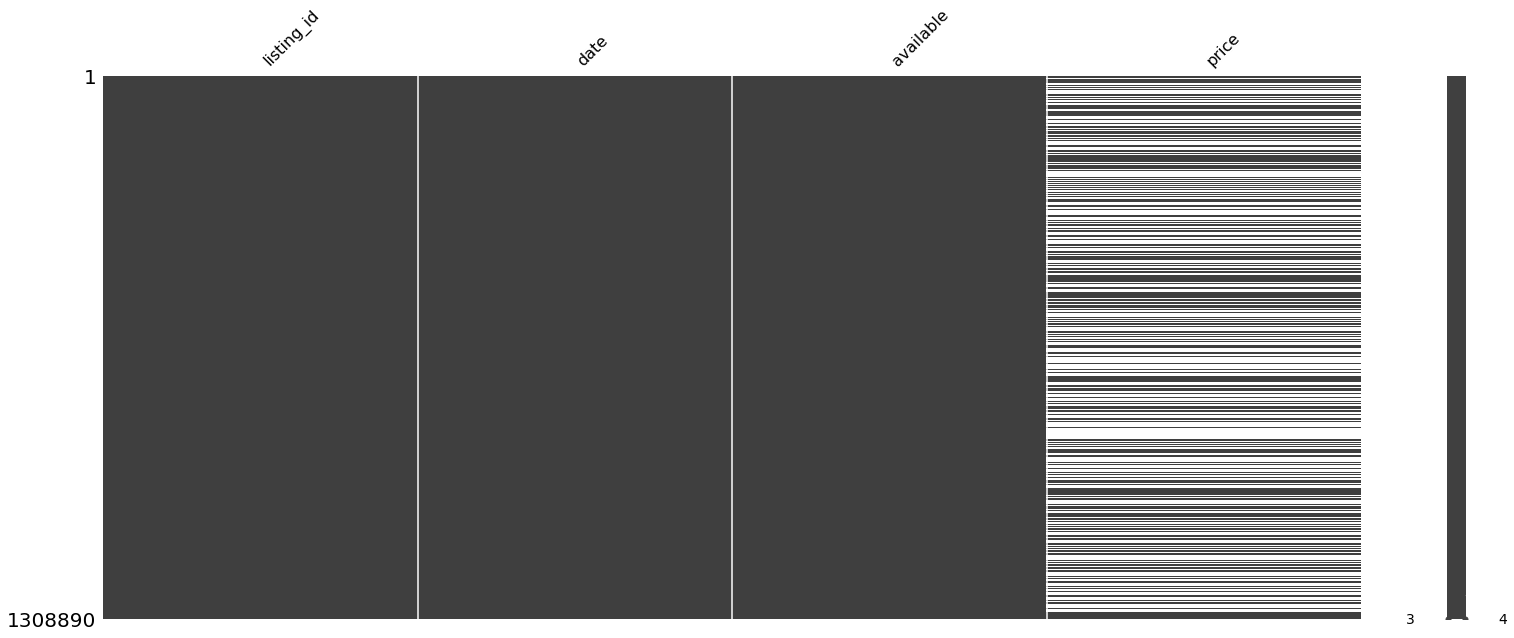

In [7]:
#Visualization of the null value in calendar.csv
import missingno as msno

msno.matrix(Calendar);

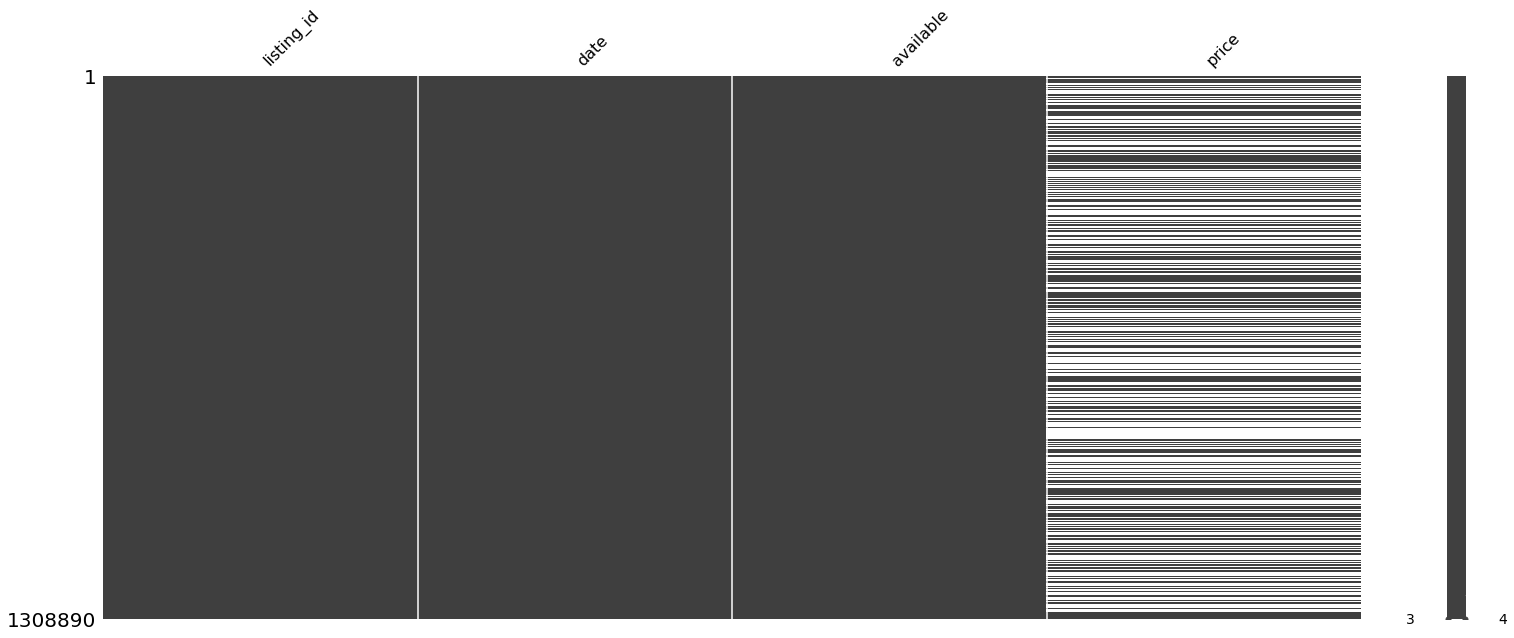

In [8]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [9]:
# Extract month and year from date string and rewrite values

Calendar['date'] = pd.to_datetime(Calendar.date)
    
month = Calendar['date'].dt.month
month = month.replace({1:'January', 2:'February', 3:'March', 4:'April', 5:'May', 6:'June', 7:'July', 8:'August', 9:'Septempber', 10:'October', 11:'November', 12:'December'})
 
year =Calendar['date'].dt.year
    
Calendar['Month'] = month
Calendar['Year'] = year

In [10]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
1200369,4261781,2016-12-05,t,$200.00,December,2016
384986,9430774,2016-12-03,f,NaN,December,2016
866150,7362715,2017-08-31,f,NaN,August,2017
19472,12535687,2017-05-01,t,$110.00,May,2017
155721,13531200,2016-11-03,t,$70.00,November,2016
1188961,13586491,2016-12-11,t,$98.00,December,2016
115756,743211,2017-07-16,t,$550.00,July,2017
990410,4180178,2017-03-24,t,$60.00,March,2017
329325,7161203,2017-04-28,t,$35.00,April,2017
587645,9698226,2016-09-10,f,NaN,Septempber,2016


In [11]:
# convert string date to datetime object
Calendar.date = pd.to_datetime(Calendar.date)

In [12]:
# Convert boolean t/f columns to 1/0 columns
boolean_columns = ['available']
for column in boolean_columns:
    Calendar[column] =  Calendar[column].apply(lambda val: True if val=='t' else False)

In [13]:
#Show 10 lines of Calendar
Calendar.sample(10)

,listing_id,date,available,price,Month,Year
290262,12351909,2017-04-19,False,NaN,April,2017
1228821,3897963,2017-07-02,True,$75.00,July,2017
674861,12648403,2016-09-29,False,NaN,Septempber,2016
682446,4995033,2016-12-18,False,NaN,December,2016
1263775,12409042,2017-01-28,False,NaN,January,2017
1266419,12736032,2016-12-12,False,NaN,December,2016
1023356,8899828,2017-06-02,False,NaN,June,2017
480430,1329627,2017-04-16,False,NaN,April,2017
1090944,7367795,2016-10-16,False,NaN,October,2016
77337,9463444,2016-10-18,False,NaN,October,2016


In [14]:
#Show the information of the data
Calendar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1308890 entries, 0 to 1308889
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   listing_id  1308890 non-null  int64         
 1   date        1308890 non-null  datetime64[ns]
 2   available   1308890 non-null  bool          
 3   price       643037 non-null   object        
 4   Month       1308890 non-null  object        
 5   Year        1308890 non-null  int64         
dtypes: bool(1), datetime64[ns](1), int64(2), object(2)
memory usage: 51.2+ MB


In [15]:
listings_df.shape

(3585, 95)

In [16]:
listings_df.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [17]:
reviews_df.shape
reviews_df.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,1178162,4724140,2013-05-21,4298113,Olivier,My stay at islam's place was really cool! Good...
1,1178162,4869189,2013-05-29,6452964,Charlotte,Great location for both airport and city - gre...
2,1178162,5003196,2013-06-06,6449554,Sebastian,We really enjoyed our stay at Islams house. Fr...
3,1178162,5150351,2013-06-15,2215611,Marine,The room was nice and clean and so were the co...
4,1178162,5171140,2013-06-16,6848427,Andrew,Great location. Just 5 mins walk from the Airp...


In [18]:
# listings_csv.dtypes
listings_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [19]:
reviews_df.set_index('id', inplace=True)

In [20]:
# convert string date to datetime object in reviews set
reviews_df.date = pd.to_datetime(reviews_df.date)

In [21]:
# test
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68275 entries, 4724140 to 98550693
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   listing_id     68275 non-null  int64         
 1   date           68275 non-null  datetime64[ns]
 2   reviewer_id    68275 non-null  int64         
 3   reviewer_name  68275 non-null  object        
 4   comments       68222 non-null  object        
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.1+ MB


In [22]:
listings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3585 entries, 0 to 3584
Data columns (total 95 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                3585 non-null   int64  
 1   listing_url                       3585 non-null   object 
 2   scrape_id                         3585 non-null   int64  
 3   last_scraped                      3585 non-null   object 
 4   name                              3585 non-null   object 
 5   summary                           3442 non-null   object 
 6   space                             2528 non-null   object 
 7   description                       3585 non-null   object 
 8   experiences_offered               3585 non-null   object 
 9   neighborhood_overview             2170 non-null   object 
 10  notes                             1610 non-null   object 
 11  transit                           2295 non-null   object 
 12  access

In [23]:
listings_df.set_index('id', inplace=True)

In [24]:
listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",NaN,...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [25]:
# convert string dates to datetime objects
listings_df.last_scraped = pd.to_datetime(listings_df.last_scraped)

In [26]:
# convert price column to float type after stripping dollar, comma character
listings_df.price = listings_df.price.str.lstrip('$').str.replace(',', '').astype('float')

In [27]:
# drop columns with no recordings

listings_df.drop(['neighbourhood_group_cleansed', 'jurisdiction_names', 'license', 'has_availability'],
                 axis=1, inplace=True)

In [28]:
# drop rows with price <= 0, bathrooms < 1, bedrooms <=0, accommodates <= 0

listings_df = listings_df[listings_df.price > 0]
listings_df = listings_df[listings_df.bathrooms >= 1]
listings_df = listings_df[listings_df.bedrooms > 0]
listings_df = listings_df[listings_df.accommodates > 0]

In [29]:
# replace float values to lower value in bathroom column

listings_df['bathrooms'] = listings_df.bathrooms.replace(1.5, 1)
listings_df['bathrooms'] = listings_df.bathrooms.replace(2.5, 2)
listings_df['bathrooms'] = listings_df.bathrooms.replace(3.5, 3)
listings_df['bathrooms'] = listings_df.bathrooms.replace(4.5, 4)

In [30]:
# convert bedrooms, bathrooms, accommodates count to int from float
listings_df.bedrooms = listings_df.bedrooms.astype('int')
listings_df.bathrooms = listings_df.bathrooms.astype('int')
listings_df.accommodates = listings_df.accommodates.astype('int')

In [31]:
# clean city column

listings_df.city.unique()

array(['Boston', 'Roslindale', 'Roslindale, Boston', 'Jamaica Plain',
       'Brookline', 'Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
       'Roxbury Crossing', 'Jamaica Plain ', 'Jamaica Plain, MA',
       'Boston (Jamaica Plain)', 'Jamaica plain ', 'ROXBURY CROSSING',
       'Mission Hill, Boston', 'boston', '波士顿',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'east Boston ', 'Charlestown',
       'Boston (Charlestown)', 'Somerville', 'Brighton', 'Brighton ',
       'Boston ', nan, 'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan',
       'Milton', 'Dorchester', 'dorchester, boston ', 'South Boston',
       'Allston', 'ALLSTON'], dtype=object)

In [32]:
listings_df[listings_df.city=='波士顿']

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_communication,review_scores_location,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
id,,,,,,,,,,,,,,,,,,,,,
4625517,https://www.airbnb.com/rooms/4625517,20160906204935,2016-09-07,GreenT&bus stops in front of door,Super convenient :30 seconds walk to Green T a...,"Awesome area of Brookline&Boston, one block fr...",Super convenient :30 seconds walk to Green T a...,none,Connivence to almost everywhere- penguins piz...,"If you are a student, I may give you 5% off.If...",...,NaN,NaN,NaN,f,f,strict,f,f,1,NaN


In [33]:
# drop row with unusual city name since there is only with observation associated with it

listings_df.drop(index=4625517, inplace=True)
listings_df.shape

(3254, 90)

In [34]:
listings_df['city_cleansed'] = listings_df.city.copy()

In [35]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [36]:
# replace all duplicate entries

listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ALLSTON', 'Allston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Roslindale, Boston', 'Roslindale')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('dorchester, boston ', 'Dorchester')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(['Boston ', 'boston'], 'Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('east Boston ', 'East Boston')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Boston (Charlestown)', 'Charlestown')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('ROXBURY CROSSING', 'Roxbury Crossing')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace('Brighton ', 'Brighton')
listings_df['city_cleansed'] = listings_df.city_cleansed.replace(
    ['Jamaica Plain, Boston', 'Jamaica Plain (Boston)',
     'Jamaica Plain ', 'Jamaica plain ', 'Boston (Jamaica Plain)',], 'Jamaica Plain')

In [37]:
listings_df.city_cleansed.unique()

array(['Boston', 'Roslindale', 'Jamaica Plain', 'Brookline',
       'Roxbury Crossing', 'Jamaica Plain, MA', 'Mission Hill, Boston',
       'Boston, Massachusetts, US', 'South End, Boston', 'Cambridge',
       'East Boston', 'Charlestown', 'Somerville', 'Brighton', nan,
       'West Roxbury', 'Newton', 'Hyde Park', 'Mattapan', 'Milton',
       'Dorchester', 'South Boston', 'Allston'], dtype=object)

In [38]:
listings_df.fillna(0, inplace=True)

In [39]:
# test
listings_df.shape

(3254, 91)

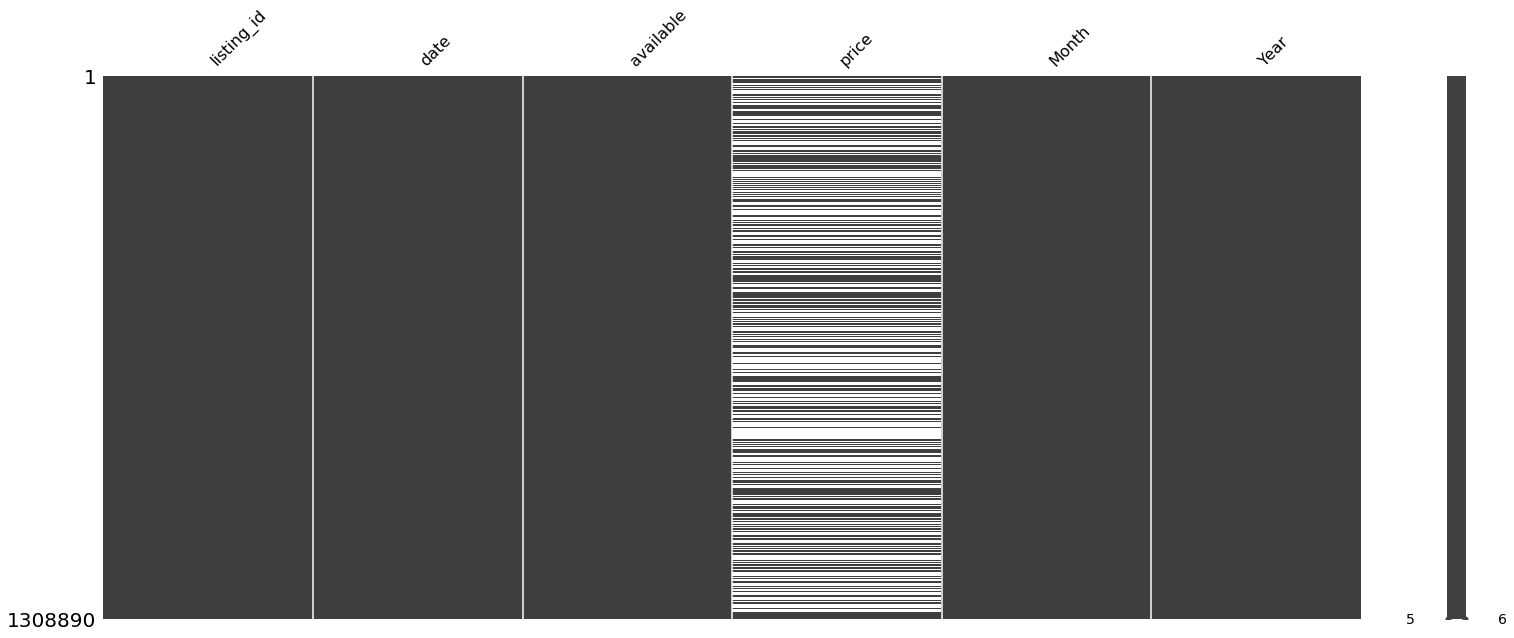

In [40]:
#Visualization of the null value in calendar.csv
msno.matrix(Calendar);

In [41]:
#Show the availability of each month in Boston
new = Calendar.groupby(['Month']).count()[['listing_id']].sort_values(by = 'listing_id', ascending = False)
new

,listing_id
Month,
August,111166
December,111166
January,111166
July,111166
March,111166
May,111166
October,111166
April,107580
June,107580


In [42]:
#Calculate the number of amenities owned by the listings
listings_df['availability_rate']=listings_df.availability_30/30

listings_df.head()

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,review_scores_value,requires_license,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,city_cleansed,availability_rate
id,,,,,,,,,,,,,,,,,,,,,
12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",0,...,0.0,f,f,moderate,f,f,1,0.00,Boston,0.000000
3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...","If you don't have a US cell phone, you can tex...",...,9.0,f,t,moderate,f,f,1,1.30,Boston,0.866667
6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,I am in a scenic part of Boston with a couple ...,...,10.0,f,f,moderate,t,f,1,0.47,Boston,0.633333
1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,Please be mindful of the property as it is old...,...,10.0,f,f,moderate,f,f,1,1.00,Boston,0.200000
7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",I have one roommate who lives on the lower lev...,...,10.0,f,f,flexible,f,f,1,2.25,Boston,0.433333


In [43]:
listings_df['availability_rate']=listings_df.availability_30/30

## Data Visualization

In [44]:
features_df = listings_df.copy()
# checking if the target label has all entries recorded
features_df.price.count()
# categorizing number of listings with room type
room_type_count = features_df.room_type.value_counts()
room_type_count

Entire home/apt    1825
Private room       1353
Shared room          76
Name: room_type, dtype: int64

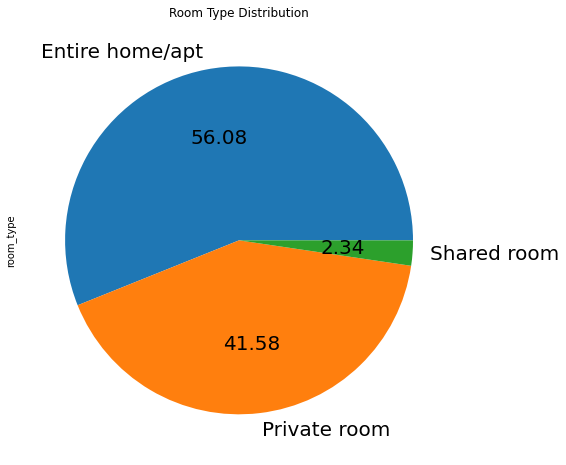

In [45]:
room_type_count.plot.pie(figsize=(8, 8), fontsize = 20, autopct = '%.2f', title = 'Room Type Distribution');
#From the chart it can be conclued that three are three types of room in the airbnb

### Visualization Busy Month

Text(0, 0.5, 'availability')

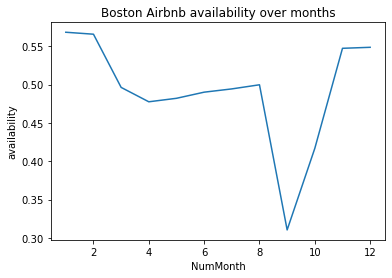

In [46]:
#Visualization the availability of each month in Boston
#Sep and Otc have the lowest availability rate which suggests these are the busiest time of the year to visit Boston
Nummonth = Calendar['date'].dt.month
Calendar['NumMonth'] = Nummonth
calendardf_copy=Calendar.copy()
Calmonth = Calendar['date'].dt.month
ax1 = calendardf_copy.groupby(['NumMonth'])['available'].mean().plot(title='Boston Airbnb availability over months')
ax1.set_ylabel("availability")

### Visualization of neighbourhood

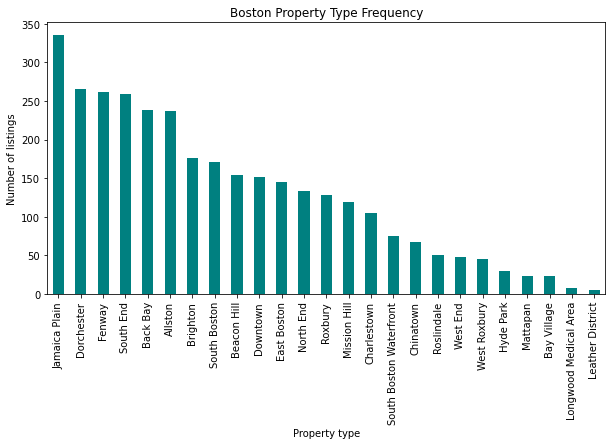

In [47]:
# clean property type column
features_df.property_type.unique()
features_df = features_df[features_df.property_type != 0]
# number of listings based on the property type
property_type_count = features_df.neighbourhood_cleansed.value_counts()
property_type_count
property_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Property Type Frequency')
plt.xlabel('Property type');
plt.ylabel('Number of listings');

### Visualization of Room Type and availability_rate

In [48]:
# analyzing the availability_rate for different room type and property type

availability_data = features_df.groupby(['neighbourhood_cleansed','room_type']).availability_rate.mean()
availability_data

neighbourhood_cleansed  room_type      
Allston                 Entire home/apt    0.188066
                        Private room       0.185778
                        Shared room        0.494444
Back Bay                Entire home/apt    0.380737
                        Private room       0.216667
                                             ...   
West End                Entire home/apt    0.755556
                        Private room       0.211111
West Roxbury            Entire home/apt    0.300000
                        Private room       0.422989
                        Shared room        0.883333
Name: availability_rate, Length: 69, dtype: float64

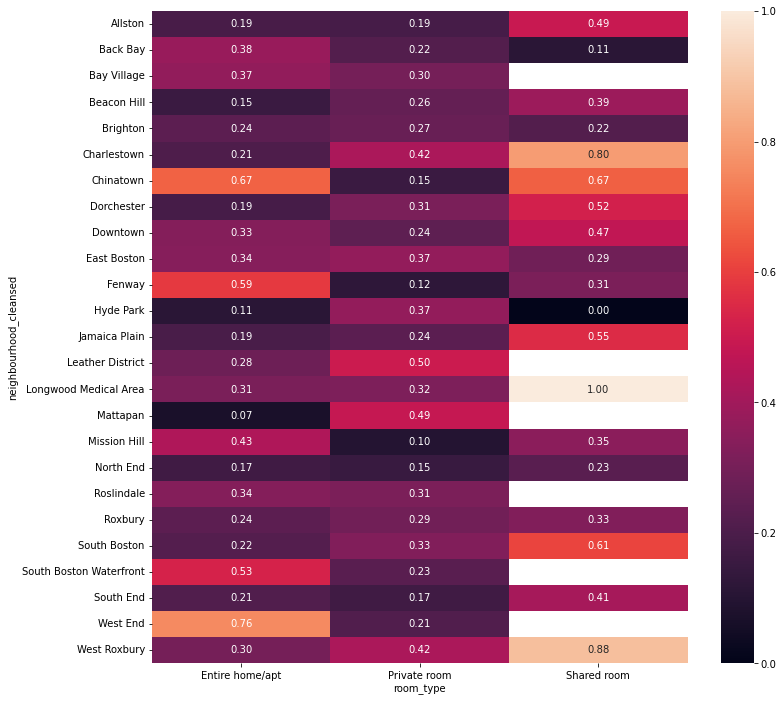

In [49]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#1. In Boston the Townhouse with entire room, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices
#2. The apartment and the House are the most popular among the us

In [50]:
# clean property type column
features_df.accommodates.unique()
features_df = features_df[features_df.accommodates != 0]
# number of listings based on the accommodates type
acc_type_count = features_df.accommodates.value_counts()
acc_type_count

2     1262
4      623
1      413
3      373
5      244
6      202
8       55
7       38
10      18
9       10
12       5
11       4
14       3
16       2
Name: accommodates, dtype: int64

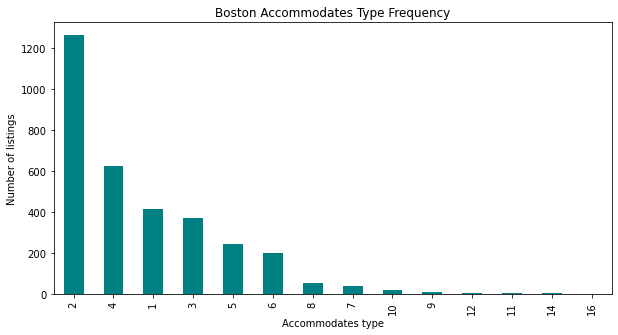

In [51]:
acc_type_count.plot.bar(color = 'teal', figsize =(10,5), title = 'Boston Accommodates Type Frequency')
plt.xlabel('Accommodates type');
plt.ylabel('Number of listings');

### Visualization of accommodates and availability_rate

In [52]:
# analyzing the availability_rate for different room type and property type

prices_data = features_df.groupby(['accommodates','room_type']).availability_rate.mean()
prices_data

accommodates  room_type      
1             Entire home/apt    0.242857
              Private room       0.241434
              Shared room        0.459350
2             Entire home/apt    0.209683
              Private room       0.259778
              Shared room        0.358065
3             Entire home/apt    0.404437
              Private room       0.270513
              Shared room        0.000000
4             Entire home/apt    0.263722
              Private room       0.257576
              Shared room        0.700000
5             Entire home/apt    0.549351
              Private room       0.484615
6             Entire home/apt    0.275500
              Private room       0.500000
7             Entire home/apt    0.426126
              Private room       1.000000
8             Entire home/apt    0.335256
              Private room       0.655556
9             Entire home/apt    0.393333
10            Entire home/apt    0.296296
11            Entire home/apt    0.450000
12  

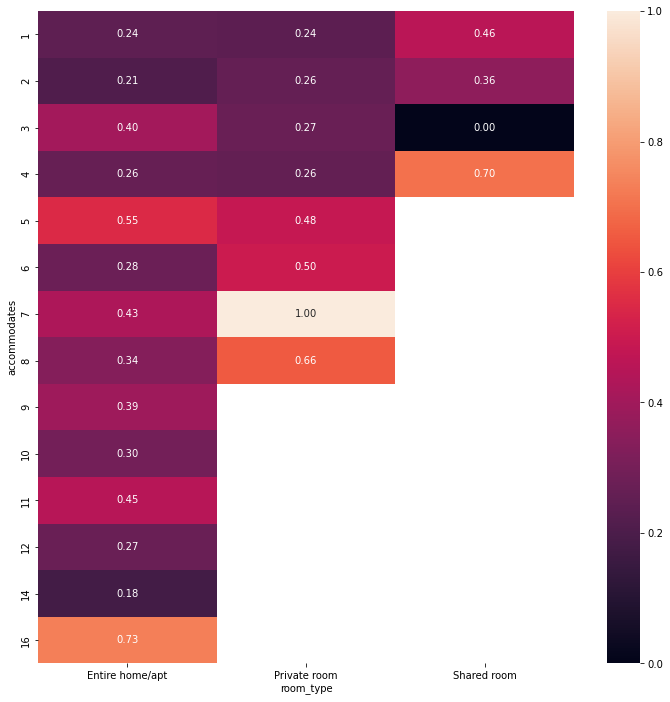

In [53]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['accommodates', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of  different room type,property type and vailability_rate

In [54]:
# clean property type column
features_df.price.unique()
features_df = features_df[features_df.price != 0]
# number of listings based on the accommodates type
acc_type_count = features_df.price.value_counts()
acc_type_count

150.0    108
200.0    106
100.0     94
250.0     93
75.0      90
        ... 
464.0      1
385.0      1
479.0      1
276.0      1
459.0      1
Name: price, Length: 317, dtype: int64

In [55]:
price_df = listings_df.copy()
price_df['price_range']=price_df.price
price_df.price_range = price_df.price_range.astype('int')
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>=0) & (price_df['price_range']<=100)].tolist(), 1)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>100) & (price_df['price_range']<=200)].tolist(), 2)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>200) & (price_df['price_range']<=300)].tolist(), 3)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>300) & (price_df['price_range']<=400)].tolist(), 4)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>400) & (price_df['price_range']<=500)].tolist(), 5)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>500) & (price_df['price_range']<=600)].tolist(), 6)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>600) & (price_df['price_range']<=700)].tolist(), 7)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>700) & (price_df['price_range']<=800)].tolist(), 8)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>800) & (price_df['price_range']<=900)].tolist(), 9)
price_df['price_range'] = price_df.price_range.replace(price_df['price_range'].loc[(price_df['price_range']>900) & (price_df['price_range']<=1000)].tolist(), 10)
# number of listings based on the accommodates type
price_type_count = price_df.price_range.value_counts()
price_type_count

1       1186
2       1119
3        607
4        219
5         57
6         28
7         17
8          5
10         4
9          2
1250       2
1400       1
1300       1
1235       1
1345       1
1372       1
4000       1
1275       1
3000       1
Name: price_range, dtype: int64

In [56]:
price_drop=price_df['price_range'].where(cond = ((price_df.price_range==1250)|(price_df.price_range==1400)|(price_df.price_range==1300)|(price_df.price_range==1372)|(price_df.price_range==1235)|(price_df.price_range==1345)|(price_df.price_range==4000)|(price_df.price_range==1275)|(price_df.price_range==3000))).dropna()
print(price_drop)

id
6093430     1400.0
8303267     1300.0
10882267    1250.0
14758045    1235.0
14798673    1345.0
6451456     1372.0
12972378    4000.0
12962229    1275.0
12679021    3000.0
14291722    1250.0
Name: price_range, dtype: float64


In [57]:
price_df=price_df.drop(index=10882267) #利用drop方法将含有特定数值的列删除
price_df=price_df.drop(index=14758045)
price_df=price_df.drop(index=14798673)
price_df=price_df.drop(index=6451456)
price_df=price_df.drop(index=12972378)
price_df=price_df.drop(index=12962229)
price_df=price_df.drop(index=12679021)
price_df=price_df.drop(index=14291722)

In [58]:
# number of listings based on the accommodates type
price_type_count = price_df.price_range.value_counts()
price_type_count

1       1186
2       1119
3        607
4        219
5         57
6         28
7         17
8          5
10         4
9          2
1400       1
1300       1
Name: price_range, dtype: int64

In [59]:
# analyzing the availability_rate for different room type and property type

prices_data = price_df.groupby(['price_range','room_type']).availability_rate.mean()
prices_data

price_range  room_type      
1            Entire home/apt    0.128205
             Private room       0.242618
             Shared room        0.402525
2            Entire home/apt    0.243717
             Private room       0.318246
             Shared room        0.529630
3            Entire home/apt    0.366143
             Private room       0.250980
4            Entire home/apt    0.552632
             Private room       0.213333
5            Entire home/apt    0.427778
             Private room       0.644444
6            Entire home/apt    0.301190
7            Entire home/apt    0.494118
8            Entire home/apt    0.200000
             Shared room        0.000000
9            Entire home/apt    0.000000
             Private room       0.000000
10           Entire home/apt    0.333333
             Private room       1.000000
1300         Entire home/apt    0.466667
1400         Private room       0.000000
Name: availability_rate, dtype: float64

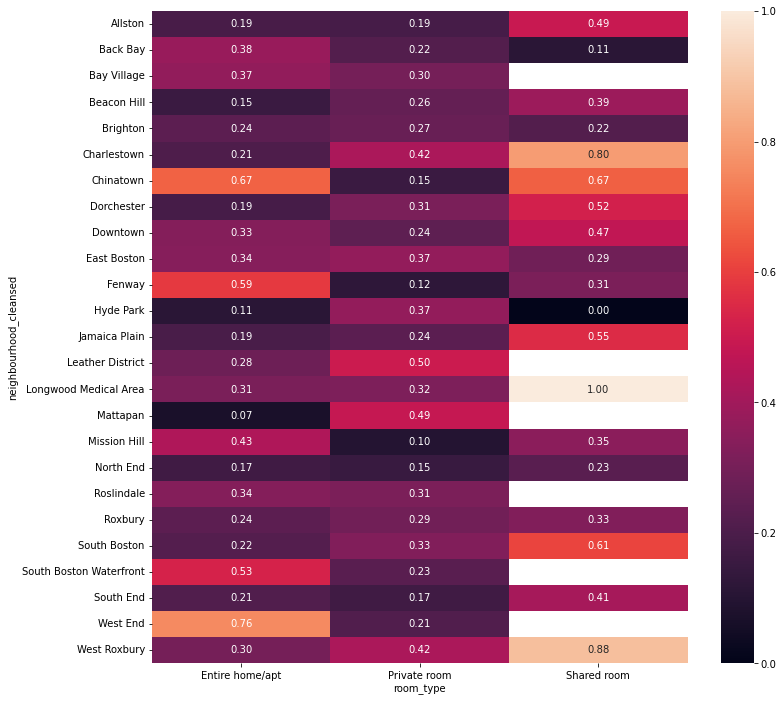

In [60]:
plt.figure(figsize=(12,12));
sns.heatmap(features_df.groupby(['neighbourhood_cleansed', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#1. In Boston the Townhouse with entire room, Guest house with Entire home/apt and Boat with Private room are the properties with maximum prices
#2. The apartment and the House are the most popular among the users

### Visualization of price_range and vailability_rate

price_range
1       0.241484
2       0.264999
3       0.359692
4       0.537139
5       0.439181
6       0.301190
7       0.494118
8       0.160000
9       0.000000
10      0.500000
1300    0.466667
1400    0.000000
Name: availability_rate, dtype: float64


Text(0.5, 1.0, '')

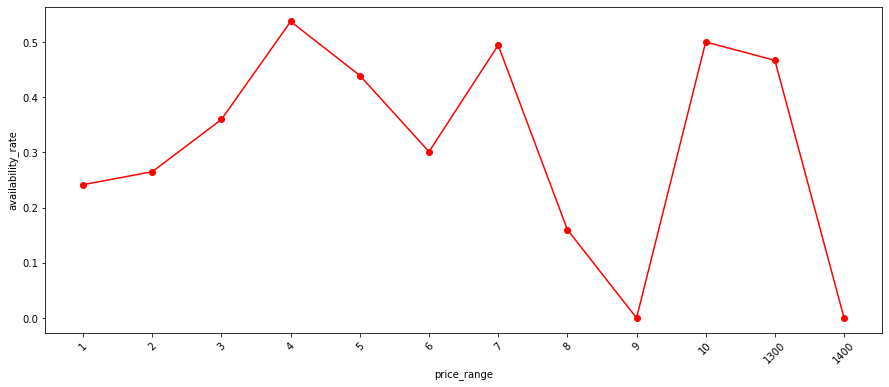

In [61]:
price_zhexiantu=  price_df.groupby(['price_range']).availability_rate.mean().dropna()
print(price_zhexiantu)
zhexiantu = price_zhexiantu.index
x = range(len(zhexiantu))
plt.figure(figsize=(15,6))
plt.xticks(x, zhexiantu, rotation=45)
plt.plot(x,price_zhexiantu.values, 'ro-')
plt.xlabel('price_range')
plt.ylabel('availability_rate');
plt.title('')

### Visualization of review_scores_rating and vailability_rate

In [62]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['review_scores_rating','room_type']).availability_rate.mean()
prices_data

review_scores_rating  room_type      
0.0                   Entire home/apt    0.419147
                      Private room       0.253785
                      Shared room        0.625000
20.0                  Entire home/apt    1.000000
                      Private room       0.050000
                                           ...   
99.0                  Entire home/apt    0.245455
                      Private room       0.208772
100.0                 Entire home/apt    0.253251
                      Private room       0.211489
                      Shared room        0.348718
Name: availability_rate, Length: 102, dtype: float64

In [63]:
price_df['rating_range']=price_df.review_scores_rating
price_df.rating_range = price_df.rating_range.astype('int')
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>=0) & (price_df['rating_range']<=10)].tolist(), 1)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>10) & (price_df['rating_range']<=20)].tolist(), 2)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>20) & (price_df['rating_range']<=30)].tolist(), 3)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>30) & (price_df['rating_range']<=40)].tolist(), 4)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>40) & (price_df['rating_range']<=50)].tolist(), 5)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>50) & (price_df['rating_range']<=60)].tolist(), 6)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>60) & (price_df['rating_range']<=70)].tolist(), 7)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>70) & (price_df['rating_range']<=80)].tolist(), 8)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>80) & (price_df['rating_range']<=90)].tolist(), 9)
price_df['rating_range'] = price_df.rating_range.replace(price_df['rating_range'].loc[(price_df['rating_range']>90) & (price_df['rating_range']<=100)].tolist(), 10)
# number of listings based on the accommodates type
rating_type_count = price_df.rating_range.value_counts()
rating_type_count

10    1723
1      743
9      489
8      204
6       32
7       31
4       11
5        7
2        6
Name: rating_range, dtype: int64

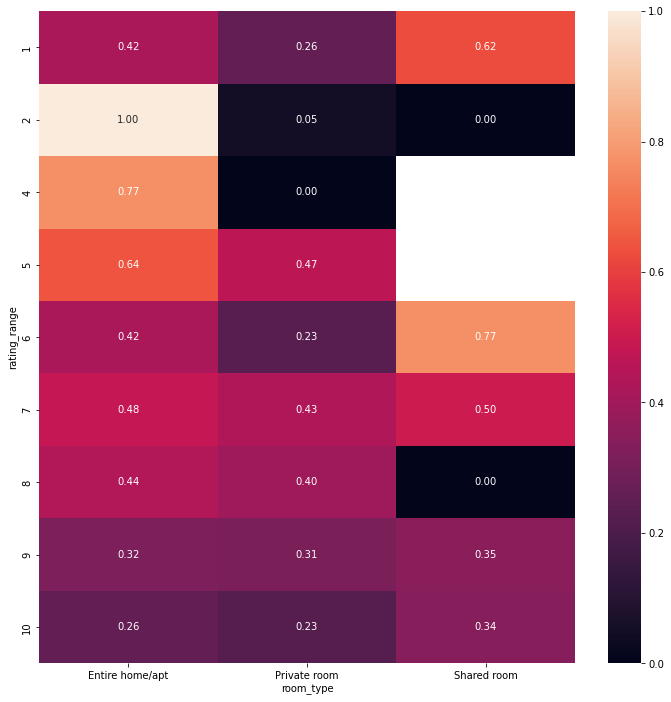

In [64]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['rating_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of host_response_rate and vailability_rate

In [65]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['host_response_rate','room_type']).availability_rate.mean()
prices_data

host_response_rate  room_type      
0                   Entire home/apt    0.063610
                    Private room       0.074037
                    Shared room        0.393939
0%                  Entire home/apt    0.333333
                    Private room       0.470833
                                         ...   
98%                 Entire home/apt    0.805952
                    Private room       0.382222
                    Shared room        0.600000
99%                 Entire home/apt    0.433333
                    Private room       0.220513
Name: availability_rate, Length: 102, dtype: float64

In [66]:
price_df['response_range']=price_df.review_scores_rating
price_df.rating_range = price_df.rating_range.astype('int')
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>=0) & (price_df['response_range']<=10)].tolist(), 1)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>10) & (price_df['response_range']<=20)].tolist(), 2)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>20) & (price_df['response_range']<=30)].tolist(), 3)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>30) & (price_df['response_range']<=40)].tolist(), 4)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>40) & (price_df['response_range']<=50)].tolist(), 5)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>50) & (price_df['response_range']<=60)].tolist(), 6)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>60) & (price_df['response_range']<=70)].tolist(), 7)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>70) & (price_df['response_range']<=80)].tolist(), 8)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>80) & (price_df['response_range']<=90)].tolist(), 9)
price_df['response_range'] = price_df.response_range.replace(price_df['response_range'].loc[(price_df['response_range']>90) & (price_df['response_range']<=100)].tolist(), 10)
# number of listings based on the accommodates type
response_type_count = price_df.response_range.value_counts()
response_type_count

10.0    1723
1.0      743
9.0      489
8.0      204
6.0       32
7.0       31
4.0       11
5.0        7
2.0        6
Name: response_range, dtype: int64

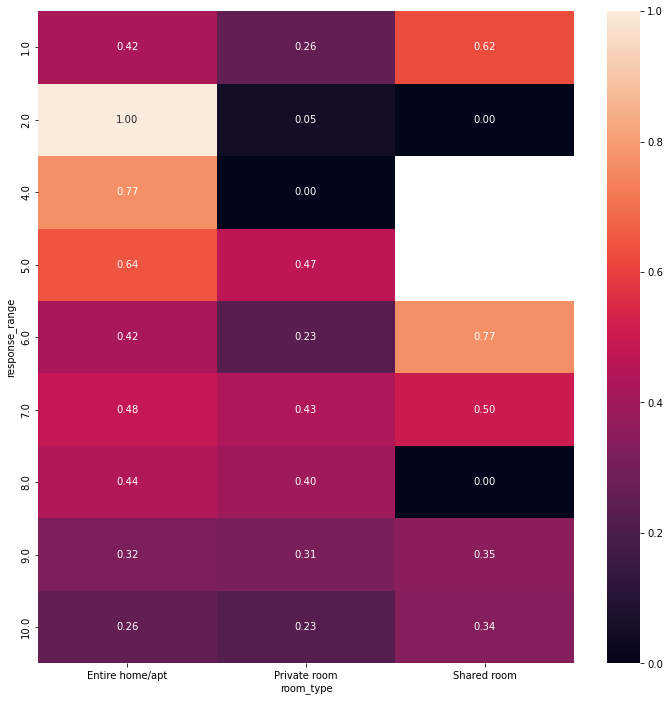

In [67]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['response_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of security_deposit and vailability_rate

In [68]:
# analyzing the prices for different room type and property type

prices_data = features_df.groupby(['security_deposit','room_type']).availability_rate.mean()
prices_data

security_deposit  room_type      
0                 Entire home/apt    0.370674
                  Private room       0.243816
                  Shared room        0.408743
$1,000.00         Entire home/apt    0.197674
                  Private room       0.453333
                                       ...   
$95.00            Entire home/apt    0.333333
                  Private room       0.316129
                  Shared room        0.000000
$950.00           Private room       0.950000
$99.00            Entire home/apt    0.369697
Name: availability_rate, Length: 83, dtype: float64

In [69]:
price_df.security_deposit = price_df.security_deposit.astype('str')
import re
price_df.security_deposit = price_df.security_deposit.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [70]:
price_df['deposit_range']=price_df.security_deposit
price_df.deposit_range = price_df.deposit_range.astype('int')
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>=0) & (price_df['deposit_range']<=100)].tolist(), 1)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>100) & (price_df['deposit_range']<=200)].tolist(), 2)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>200) & (price_df['deposit_range']<=300)].tolist(), 3)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>300) & (price_df['deposit_range']<=400)].tolist(), 4)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>400) & (price_df['deposit_range']<=500)].tolist(), 5)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>500) & (price_df['deposit_range']<=600)].tolist(), 6)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>600) & (price_df['deposit_range']<=700)].tolist(), 7)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>700) & (price_df['deposit_range']<=800)].tolist(), 8)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>800) & (price_df['deposit_range']<=900)].tolist(), 9)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>900) & (price_df['deposit_range']<=1000)].tolist(), 10)
price_df['deposit_range'] = price_df.deposit_range.replace(price_df['deposit_range'].loc[(price_df['deposit_range']>1000)].tolist(), 11)
# number of listings based on the accommodates type
deposit_type_count = price_df.deposit_range.value_counts()
deposit_type_count

1     2338
2      264
3      232
5      220
4      100
10      50
11      19
8       12
6        9
7        2
Name: deposit_range, dtype: int64

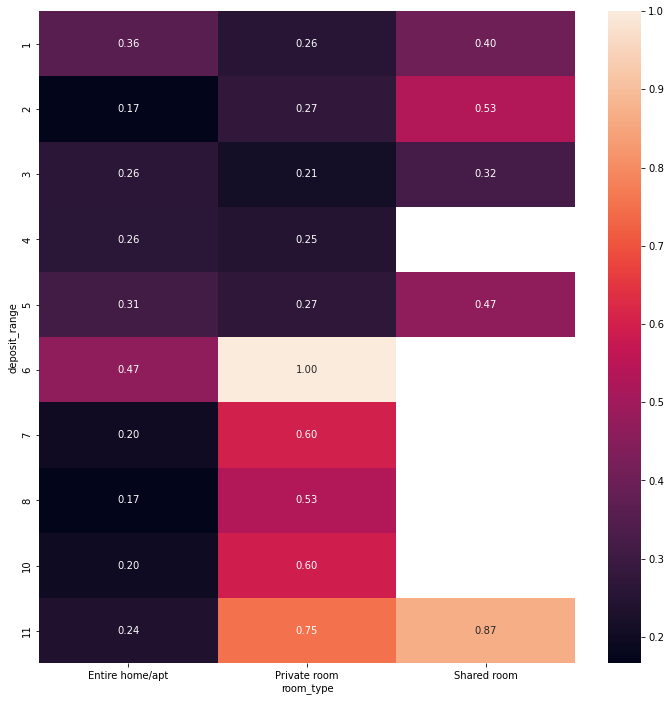

In [71]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['deposit_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of cleaning_fee and vailability_rate

In [72]:
price_df.cleaning_fee = price_df.cleaning_fee.astype('str')
import re
price_df.cleaning_fee = price_df.cleaning_fee.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [73]:
# analyzing the prices for different room type and property type

cleaning_data = price_df.groupby(['cleaning_fee','room_type']).availability_rate.mean()
cleaning_data

cleaning_fee  room_type      
0.0           Entire home/apt    0.215167
              Private room       0.252807
              Shared room        0.378571
5.0           Entire home/apt    0.000000
              Private room       0.170940
                                   ...   
225.0         Entire home/apt    0.093333
              Private room       0.250000
230.0         Private room       1.000000
250.0         Entire home/apt    0.230952
300.0         Entire home/apt    0.750000
Name: availability_rate, Length: 127, dtype: float64

In [74]:
price_df['cleaning_range']=price_df.cleaning_fee
price_df.deposit_range = price_df.deposit_range.astype('int')
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>=0) & (price_df['cleaning_range']<=50)].tolist(), 1)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>50) & (price_df['cleaning_range']<=100)].tolist(), 2)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>100) & (price_df['cleaning_range']<=150)].tolist(), 3)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>150) & (price_df['cleaning_range']<=200)].tolist(), 4)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>200) & (price_df['cleaning_range']<=250)].tolist(), 5)
price_df['cleaning_range'] = price_df.cleaning_range.replace(price_df['cleaning_range'].loc[(price_df['cleaning_range']>250) & (price_df['cleaning_range']<=300)].tolist(), 6)
# number of listings based on the accommodates type
cleaning_type_count = price_df.cleaning_range.value_counts()
cleaning_type_count

1.0    2187
2.0     774
3.0     202
4.0      59
5.0      22
6.0       2
Name: cleaning_range, dtype: int64

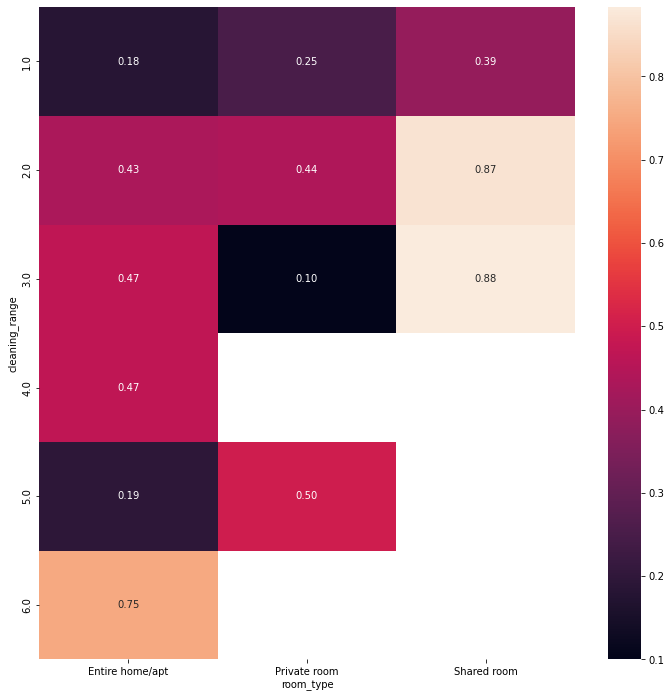

In [75]:
plt.figure(figsize=(12,12));
sns.heatmap(price_df.groupby(['cleaning_range', 'room_type']).availability_rate.mean().unstack(),annot=True, fmt=".2f");
#From the graph it can be seen that :
#The accommodates also has the influence on the price.
#1. In Boston the highest price of the accommodates
#

### Visualization of Amenities Num

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

# Change datatype:Split String
amenities = listings_df.amenities.map(lambda ele: [amenity_list.replace('"', '').replace('{', '').replace('}', '').replace('/', '') for amenity_list in ele.split(',')])
amenities

#Data frame mapping
mlb = MultiLabelBinarizer()
fit = pd.DataFrame(mlb.fit_transform(amenities), columns=mlb.classes_, index=amenities.index)

In [77]:
# Combine ameamenities to listing data:
listings_df = pd.concat([listings_df, fit], axis = 1, sort = False)
listings_df.sample(5)

,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,notes,...,Smoke Detector,Smoking Allowed,Suitable for Events,TV,Washer,Washer Dryer,Wheelchair Accessible,Wireless Internet,translation missing: en.hosting_amenity_49,translation missing: en.hosting_amenity_50
id,,,,,,,,,,,,,,,,,,,,,
9607296,https://www.airbnb.com/rooms/9607296,20160906204935,2016-09-07,Be our Guest in Boston,Our home is located on a fairly quiet street i...,0,Our home is located on a fairly quiet street i...,none,0,0,...,1,0,0,0,0,0,0,1,0,0
14756184,https://www.airbnb.com/rooms/14756184,20160906204935,2016-09-07,1BD in Shared Apartment,1 bedroom in a shared apartment unit. All new ...,0,1 bedroom in a shared apartment unit. All new ...,none,0,0,...,1,0,0,1,1,0,0,1,0,0
13434817,https://www.airbnb.com/rooms/13434817,20160906204935,2016-09-07,Two Bedroom Kenmore Square,This is a great apartment for a group. You're ...,"This is an apartment in a central, classic bui...",This is a great apartment for a group. You're ...,none,0,0,...,1,0,0,1,1,0,0,1,0,0
7678756,https://www.airbnb.com/rooms/7678756,20160906204935,2016-09-07,Renovated 1 Bed near Airport,Totally renovated 1st floor 1 bedroom condomin...,"It's a fantastic 1 bedroom, much nicer than an...",Totally renovated 1st floor 1 bedroom condomin...,none,"Best kept secret in Boston! Amazing food, park...",You can park on the street for free except dur...,...,1,0,0,1,1,0,0,1,0,0
12366845,https://www.airbnb.com/rooms/12366845,20160906204935,2016-09-07,Convenient 3bd Near Downtown,This Location is 15-minute Walk to Andrew stat...,0,This Location is 15-minute Walk to Andrew stat...,none,0,0,...,0,0,0,0,1,0,0,0,0,1


In [78]:
#The most popular 10 amenities
amenitie = fit
amenitie.sum().sort_values(ascending = False)[:10]

Wireless Internet    3115
Heating              3070
Kitchen              2978
Essentials           2764
Smoke Detector       2658
Air Conditioning     2538
Internet             2373
TV                   2350
Washer               2266
Dryer                2263
dtype: int64

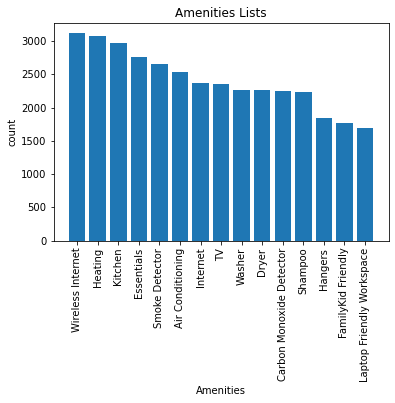

In [79]:
# Plot Amenities Lists:
amen = fit.sum().sort_values(ascending = False)[:15]
plt.bar(amen.index, amen.values)
plt.title('Amenities Lists')
plt.xlabel('Amenities')
plt.ylabel('count')
plt.xticks(rotation = 90);

In [80]:
#Calculate the number of amenities owned by the listings
listings_df['amenities_sum']=fit.sum(axis=1)


In [81]:
# The relationship between the number of listings and the number of amenities sum
amenities_sum_count = listings_df.amenities_sum.value_counts()
amenities_sum_count


19    276
16    271
15    268
17    262
18    253
14    224
13    191
20    184
12    184
21    179
11    161
22    144
23    111
10    110
9      81
24     63
8      63
25     47
7      39
1      30
5      23
26     21
27     21
6      20
4      11
3       6
2       5
28      3
30      1
29      1
31      1
Name: amenities_sum, dtype: int64

<BarContainer object of 10 artists>

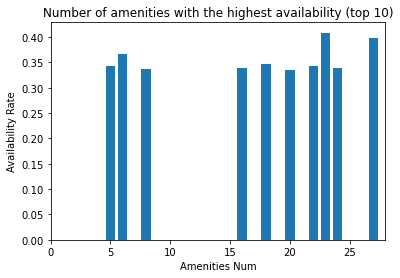

In [82]:
# Relationship between number of amenities and availabilit (positive)
plt.title('Number of amenities with the highest availability (top 10)')
plt.xlabel('Amenities Num')
plt.ylabel('Availability Rate')

X_axis=listings_df.amenities_sum.value_counts().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna()
plt.xlim((0,X_axis.index.max()+1)) # Determine the range of the X-axis

amen_score =  listings_df.groupby(['amenities_sum'])['availability_rate'].mean().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna().sort_values(ascending = False)[:10]
plt.bar(amen_score.index, amen_score.values)

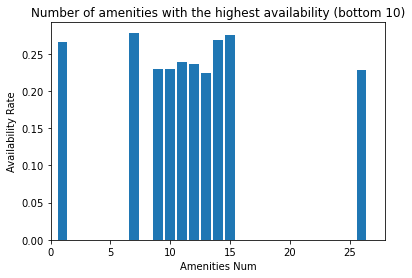

In [83]:
plt.title('Number of amenities with the highest availability (bottom 10)')
plt.xlabel('Amenities Num')
plt.ylabel('Availability Rate')

X_axis=listings_df.amenities_sum.value_counts().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna()
plt.xlim((0,X_axis.index.max()+1)) # Determine the range of the X-axis

amen_score =  listings_df.groupby(['amenities_sum'])['availability_rate'].mean().where(cond = (listings_df.amenities_sum.value_counts()>=20)).dropna().sort_values(ascending = True)[:10]
plt.bar(amen_score.index, amen_score.values);

## Linear Regression

### This Chapter uses the Linear Regression model to figure the relationship among
 availability_rate and host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated
 
#### 'y' --->availability_rate
#### 'x' --->host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated

#### Then set the test_size=0.20, random_state=45
Fit X_train, y_train to get the R2 score is 0.1769579409285018
#### The result shows there is not any Linear correlation among then


In [84]:
# Create new list from listing_data(only int and float)

num = ['availability_rate','host_response_rate','monthly_price','amenities_sum']
listings_df.dropna(subset=['cleaning_fee'], inplace=True)
listings_df.cleaning_fee = listings_df.cleaning_fee.astype('str')
import re
listings_df.cleaning_fee = listings_df.cleaning_fee.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['extra_people'], inplace=True)
listings_df.extra_people = listings_df.extra_people.astype('str')
import re
listings_df.extra_people = listings_df.extra_people.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)
listings_df.dropna(subset=['host_response_rate'], inplace=True)
listings_df.host_response_rate = listings_df.host_response_rate.astype('str')
import re
listings_df.host_response_rate = listings_df.host_response_rate.apply(
    lambda value: re.sub(r'\%|,', '', value)
).astype(float)
listings_df.dropna(subset=['monthly_price'], inplace=True)
listings_df.monthly_price = listings_df.monthly_price.astype('str')
import re
listings_df.monthly_price = listings_df.monthly_price.apply(
    lambda value: re.sub(r'\$|,', '', value)
).astype(float)

In [85]:
data1 = listings_df.select_dtypes(include=['int32','int64', 'float64'])[num]

In [86]:
# Create new list from listing_data(only Object)

cat = ['neighbourhood','calendar_updated']

In [87]:
data1[cat] = listings_df[cat]
d_data = data1.copy()
new_data = pd.get_dummies(d_data)
new_data = new_data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=False)

In [88]:
y = new_data['availability_rate']
X = new_data.drop('availability_rate',  axis =1 )

In [89]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=45)

In [90]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.linear_model import LinearRegression
import seaborn as sb

from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

In [91]:
# Linear Regression Model:

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)

r2_score(y_test, y_pred)

0.1769579409285018

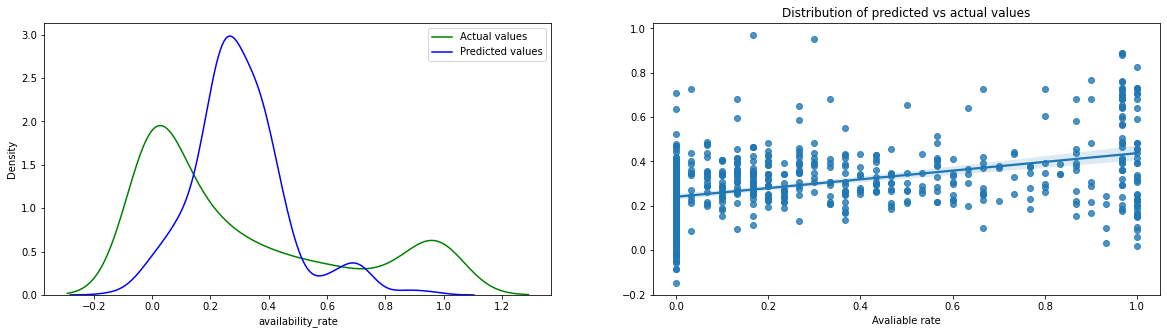

In [92]:
# Plot predicted and original values:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_pred, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_pred)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Avaliable rate');

In [93]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))

y_pred = reg.predict(X_test) 
print_metrics(y_test, y_pred) 

Mean Square Error      = 0.10350988566285782
Root Mean Square Error = 0.3217295225229693
Mean Absolute Error    = 0.2558973987891672
Median Absolute Error  = 0.21976372742898262
R^2                    = 0.1769579409285018


## Random Forest

### ***This Chapter uses the Random Forest model to figure the relationship among***
 *availability_rate* 
*host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated*

##### 'y' --->availability_rate
##### 'x' --->host_response_rate,monthly_price,amenities_sum,neighbourhood,calendar_updated


#### Then set the random_state =42
Fit X_train, y_train to get the R2 score is 0.3338729440287239
#### It shows there is not any Classification relation

#### Then use GridSearch to adjust the parameter get the  test r2:0.275
 Mean Square Error      = 0.09114738416406988
 Root Mean Square Error = 0.30190625062106596
 Mean Absolute Error    = 0.21406144088459755
 Median Absolute Error  = 0.14375000000000007
 R^2                    = 0.27525636550581667

#### Then we use the Figure to show the most relative elements:
##### host_response_rate and  amenities_sum

In [94]:
from sklearn.ensemble import RandomForestRegressor
ran = RandomForestRegressor(n_estimators = 100,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 12)
ran.fit(X_train, y_train)
y_preds = ran.predict(X_test)
r2_score(y_test, y_preds)

0.3338729440287239

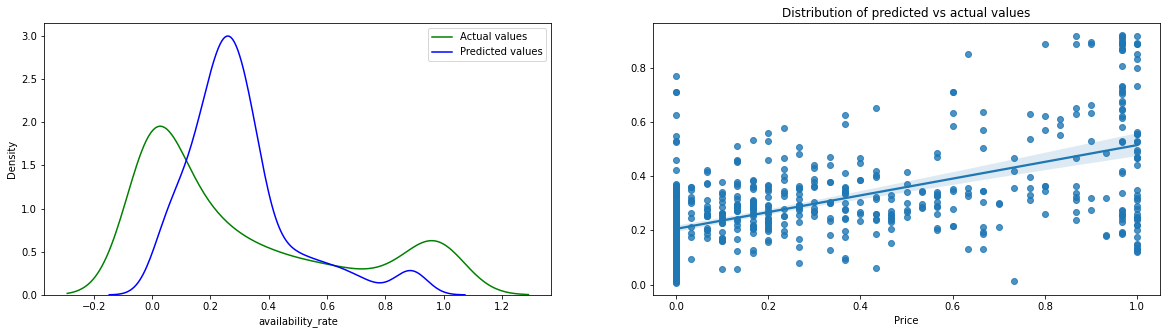

In [95]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [96]:
from sklearn.model_selection import GridSearchCV
#GridSearch to adjust the parameter
rfc=RandomForestRegressor()
param = {"n_estimators": range(1,20),"min_samples_leaf": range(1,20)}     #Adjust the parameter
gs = GridSearchCV(estimator=rfc,param_grid=param,cv=5)
gs.fit(X_train,y_train)    

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'min_samples_leaf': range(1, 20),
                         'n_estimators': range(1, 20)})

In [97]:
#Export the parameter
best_score=gs.best_score_
best_params=gs.best_params_
print(best_score,best_params,end='\n')

0.25668987427919576 {'min_samples_leaf': 11, 'n_estimators': 17}


In [98]:
#Adjust the parameter then evaluation
rf=RandomForestRegressor(n_estimators = 16,oob_score = True,n_jobs = -1,random_state =42,max_features='auto',min_samples_leaf = 1)
rf.fit(X_train,y_train)
predictions= rf.predict(X_test)
print("train r2:%.3f"%r2_score(y_train,rf.predict(X_train)))         #Evaluation
print("test r2:%.3f"%r2_score(y_test,predictions)) 

train r2:0.829
test r2:0.275


D:\project\Anacdona\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


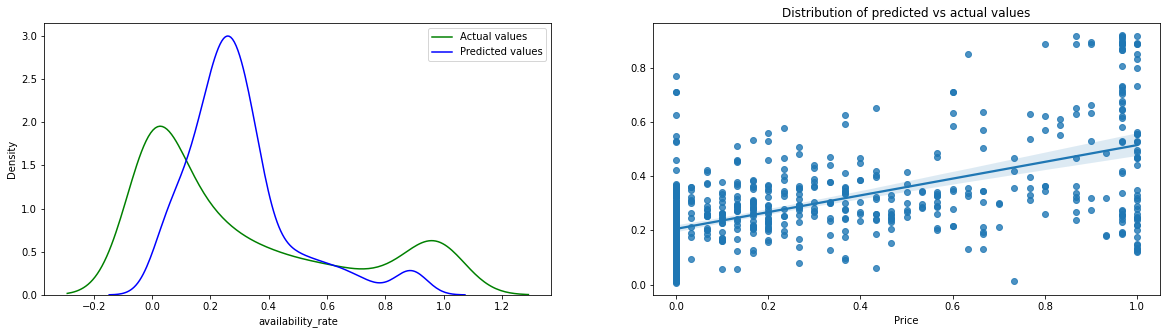

In [99]:
# Plot predicted and original values:
plt.figure(figsize=[20,5])
plt.subplot(1,2,1)
ax1 = sb.kdeplot(data=y_test, color="g", label='Actual values')
ax2 = sb.kdeplot(data=y_preds, color="b", label='Predicted values')
plt.legend();

plt.subplot(1,2,2)
sb.regplot(x=y_test, y=y_preds)
plt.title('Distribution of predicted vs actual values')
plt.xlabel('Price');

In [100]:
import sklearn.metrics as sklm #https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
def print_metrics(y_true, y_predicted):
    ## First compute R^2 and the adjusted R^2
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html
    r2 = sklm.r2_score(y_true, y_predicted)
    
    ## Print the usual metrics and the R^2 values
    print('Mean Square Error      = ' + str(sklm.mean_squared_error(y_true, y_predicted)))
    print('Root Mean Square Error = ' + str(math.sqrt(sklm.mean_squared_error(y_true, y_predicted))))
    print('Mean Absolute Error    = ' + str(sklm.mean_absolute_error(y_true, y_predicted)))
    print('Median Absolute Error  = ' + str(sklm.median_absolute_error(y_true, y_predicted)))
    # R-squared evaluates the scatter of the data points around the fitted regression line. It is also called the coefficient of determination, or the coefficient of multiple determination for multiple regression. For the same data set, higher R-squared values represent smaller differences between the observed data and the fitted values.
    # https://statisticsbyjim.com/regression/interpret-r-squared-regression/
    print('R^2                    = ' + str(r2))

y_pred = rf.predict(X_test) 
print_metrics(y_test, y_pred) 

Mean Square Error      = 0.09114738416406988
Root Mean Square Error = 0.30190625062106596
Mean Absolute Error    = 0.21406144088459758
Median Absolute Error  = 0.14375000000000002
R^2                    = 0.27525636550581667


In [101]:
feature_list = list(X.columns) 

importances = list(rf.feature_importances_)    
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list,importances)]     
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)                
[print('Variable: {:12} Importance: {}'.format(*pair)) for pair in feature_importances]            

Variable: amenities_sum Importance: 0.21
Variable: host_response_rate Importance: 0.19
Variable: monthly_price Importance: 0.15
Variable: neighbourhood_0 Importance: 0.02
Variable: neighbourhood_Allston-Brighton Importance: 0.02
Variable: neighbourhood_Fenway/Kenmore Importance: 0.02
Variable: neighbourhood_Jamaica Plain Importance: 0.02
Variable: neighbourhood_South End Importance: 0.02
Variable: neighbourhood_West End Importance: 0.02
Variable: calendar_updated_a week ago Importance: 0.02
Variable: calendar_updated_never Importance: 0.02
Variable: calendar_updated_today Importance: 0.02
Variable: neighbourhood_Back Bay Importance: 0.01
Variable: neighbourhood_Beacon Hill Importance: 0.01
Variable: neighbourhood_Charlestown Importance: 0.01
Variable: neighbourhood_Dorchester Importance: 0.01
Variable: neighbourhood_East Boston Importance: 0.01
Variable: neighbourhood_Hyde Park Importance: 0.01
Variable: neighbourhood_Mattapan Importance: 0.01
Variable: neighbourhood_Mission Hill Impor

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

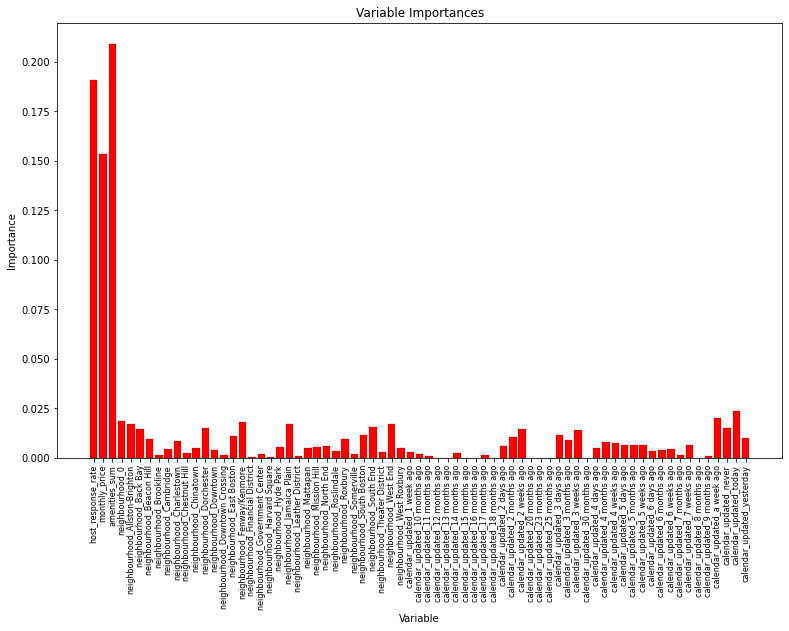

In [102]:
#Draw
f,ax = plt.subplots(figsize = (13,8))    #Picture size
x_values = list(range(len(importances)))     
plt.bar(x_values,importances, orientation = 'vertical', color = 'r',edgecolor = 'k',linewidth =0.2)    #Draw picture
# Tick labels for x axis
plt.xticks(x_values, feature_list, rotation='vertical',fontsize=8)      
# Axis labels and title
plt.ylabel('Importance'); plt.xlabel('Variable'); plt.title('Variable Importances');

In [103]:
# Show the attribute of the importance
importances_df = pd.DataFrame()
importances_df["Feature Name"]=feature_list
importances_df["Feature Importance"]=importances
p=importances_df.sort_values("Feature Importance",ascending=False)
print(importances_df)

                      Feature Name  Feature Importance
0               host_response_rate            0.190705
1                    monthly_price            0.153328
2                    amenities_sum            0.209161
3                  neighbourhood_0            0.018615
4   neighbourhood_Allston-Brighton            0.016894
..                             ...                 ...
66   calendar_updated_9 months ago            0.001127
67     calendar_updated_a week ago            0.020200
68          calendar_updated_never            0.015096
69          calendar_updated_today            0.023587
70      calendar_updated_yesterday            0.010026

[71 rows x 2 columns]


In [104]:
lost_result=list(p['Feature Name'][:15])                
print(lost_result)

['amenities_sum', 'host_response_rate', 'monthly_price', 'calendar_updated_today', 'calendar_updated_a week ago', 'neighbourhood_0', 'neighbourhood_Fenway/Kenmore', 'neighbourhood_West End', 'neighbourhood_Jamaica Plain', 'neighbourhood_Allston-Brighton', 'neighbourhood_South End', 'calendar_updated_never', 'neighbourhood_Dorchester', 'neighbourhood_Back Bay', 'calendar_updated_2 weeks ago']
